In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.stats import norm

In [117]:
# dataframe for demand log
df_demand_log = pd.read_excel('FruitSoul Demand Log Fixed.xlsx')
df_demand_log['Earliest Delivery Date'] = df_demand_log['Earliest Delivery Date'].dt.date
df_demand_log['Preferred Delivery Date'] = df_demand_log['Preferred Delivery Date'].dt.date
df_demand_log['Latest Delivery Date'] = df_demand_log['Latest Delivery Date'].dt.date
df_demand_log['Earliest Delivery Date'] = pd.to_datetime(df_demand_log['Earliest Delivery Date'])
df_demand_log['Preferred Delivery Date'] = pd.to_datetime(df_demand_log['Preferred Delivery Date'])
df_demand_log['Latest Delivery Date'] = pd.to_datetime(df_demand_log['Latest Delivery Date'])
df_demand_log['Demand Request Date'] = pd.to_datetime(df_demand_log['Demand Request Date'])
df_demand_log.rename(columns={'Demand Request Date': 'demandRequest'}, inplace=True)
df_demand_log.rename(columns={'Jar Size  (vol. ounces)': 'jarSize'}, inplace=True)
df_demand_log.rename(columns={'Earliest Delivery Date': 'earliestDelivery'}, inplace=True)
df_demand_log.rename(columns={'Preferred Delivery Date': 'preferredDelivery'}, inplace=True)
df_demand_log.rename(columns={'Latest Delivery Date': 'latestDelivery'}, inplace=True)
df_demand_log

DemandID demandRequest                  Mix  jarSize       State  \
0              1    2021-01-01          Apple-Mango        8    Maryland   
1              2    2021-01-01      Blueberry-Lemon       32    Kentucky   
2              3    2021-01-01  Orange-Passionfruit       16   Minnesota   
3              4    2021-01-01  Orange-Passionfruit       16  California   
4              5    2021-01-01  Orange-Passionfruit       32   Louisiana   
...          ...           ...                  ...      ...         ...   
835374    835375    2023-12-31  Orange-Passionfruit       32     Arizona   
835375    835376    2023-12-31      Peach-Raspberry       32  California   
835376    835377    2023-12-31      Blueberry-Lemon       16     Arizona   
835377    835378    2023-12-31      Strawberry-Kiwi        8  California   
835378    835379    2023-12-31    Grape-Pomegranate        8    Missouri   

        Quantity earliestDelivery preferredDelivery latestDelivery  
0              1       2021-01-01        2021-01-04     2021-01-07  
1              1       2021-01-04        2021-01-06     2021-01-09  
2              1       2021-01-07        2021-01-10     2021-01-11  
3              1       2021-01-07        2021-01-11     2021-01-14  
4              1       2021-01-01        2021-01-04     2021-01-10  
...          ...              ...               ...            ...  
835374         1       2023-12-31        2024-01-05     2024-01-13  
835375         1       2023-12-31        2024-01-01     2024-01-01  
835376         1       2023-12-31        2024-01-02     2024-01-02  
835377         1       2023-12-31        2024-01-03     2024-01-03  
835378         1       2023-12-31        2024-01-02     2024-01-02  

[835379 rows x 9 columns]

# Task 1

### Demand Requests by Mix and Jar Size

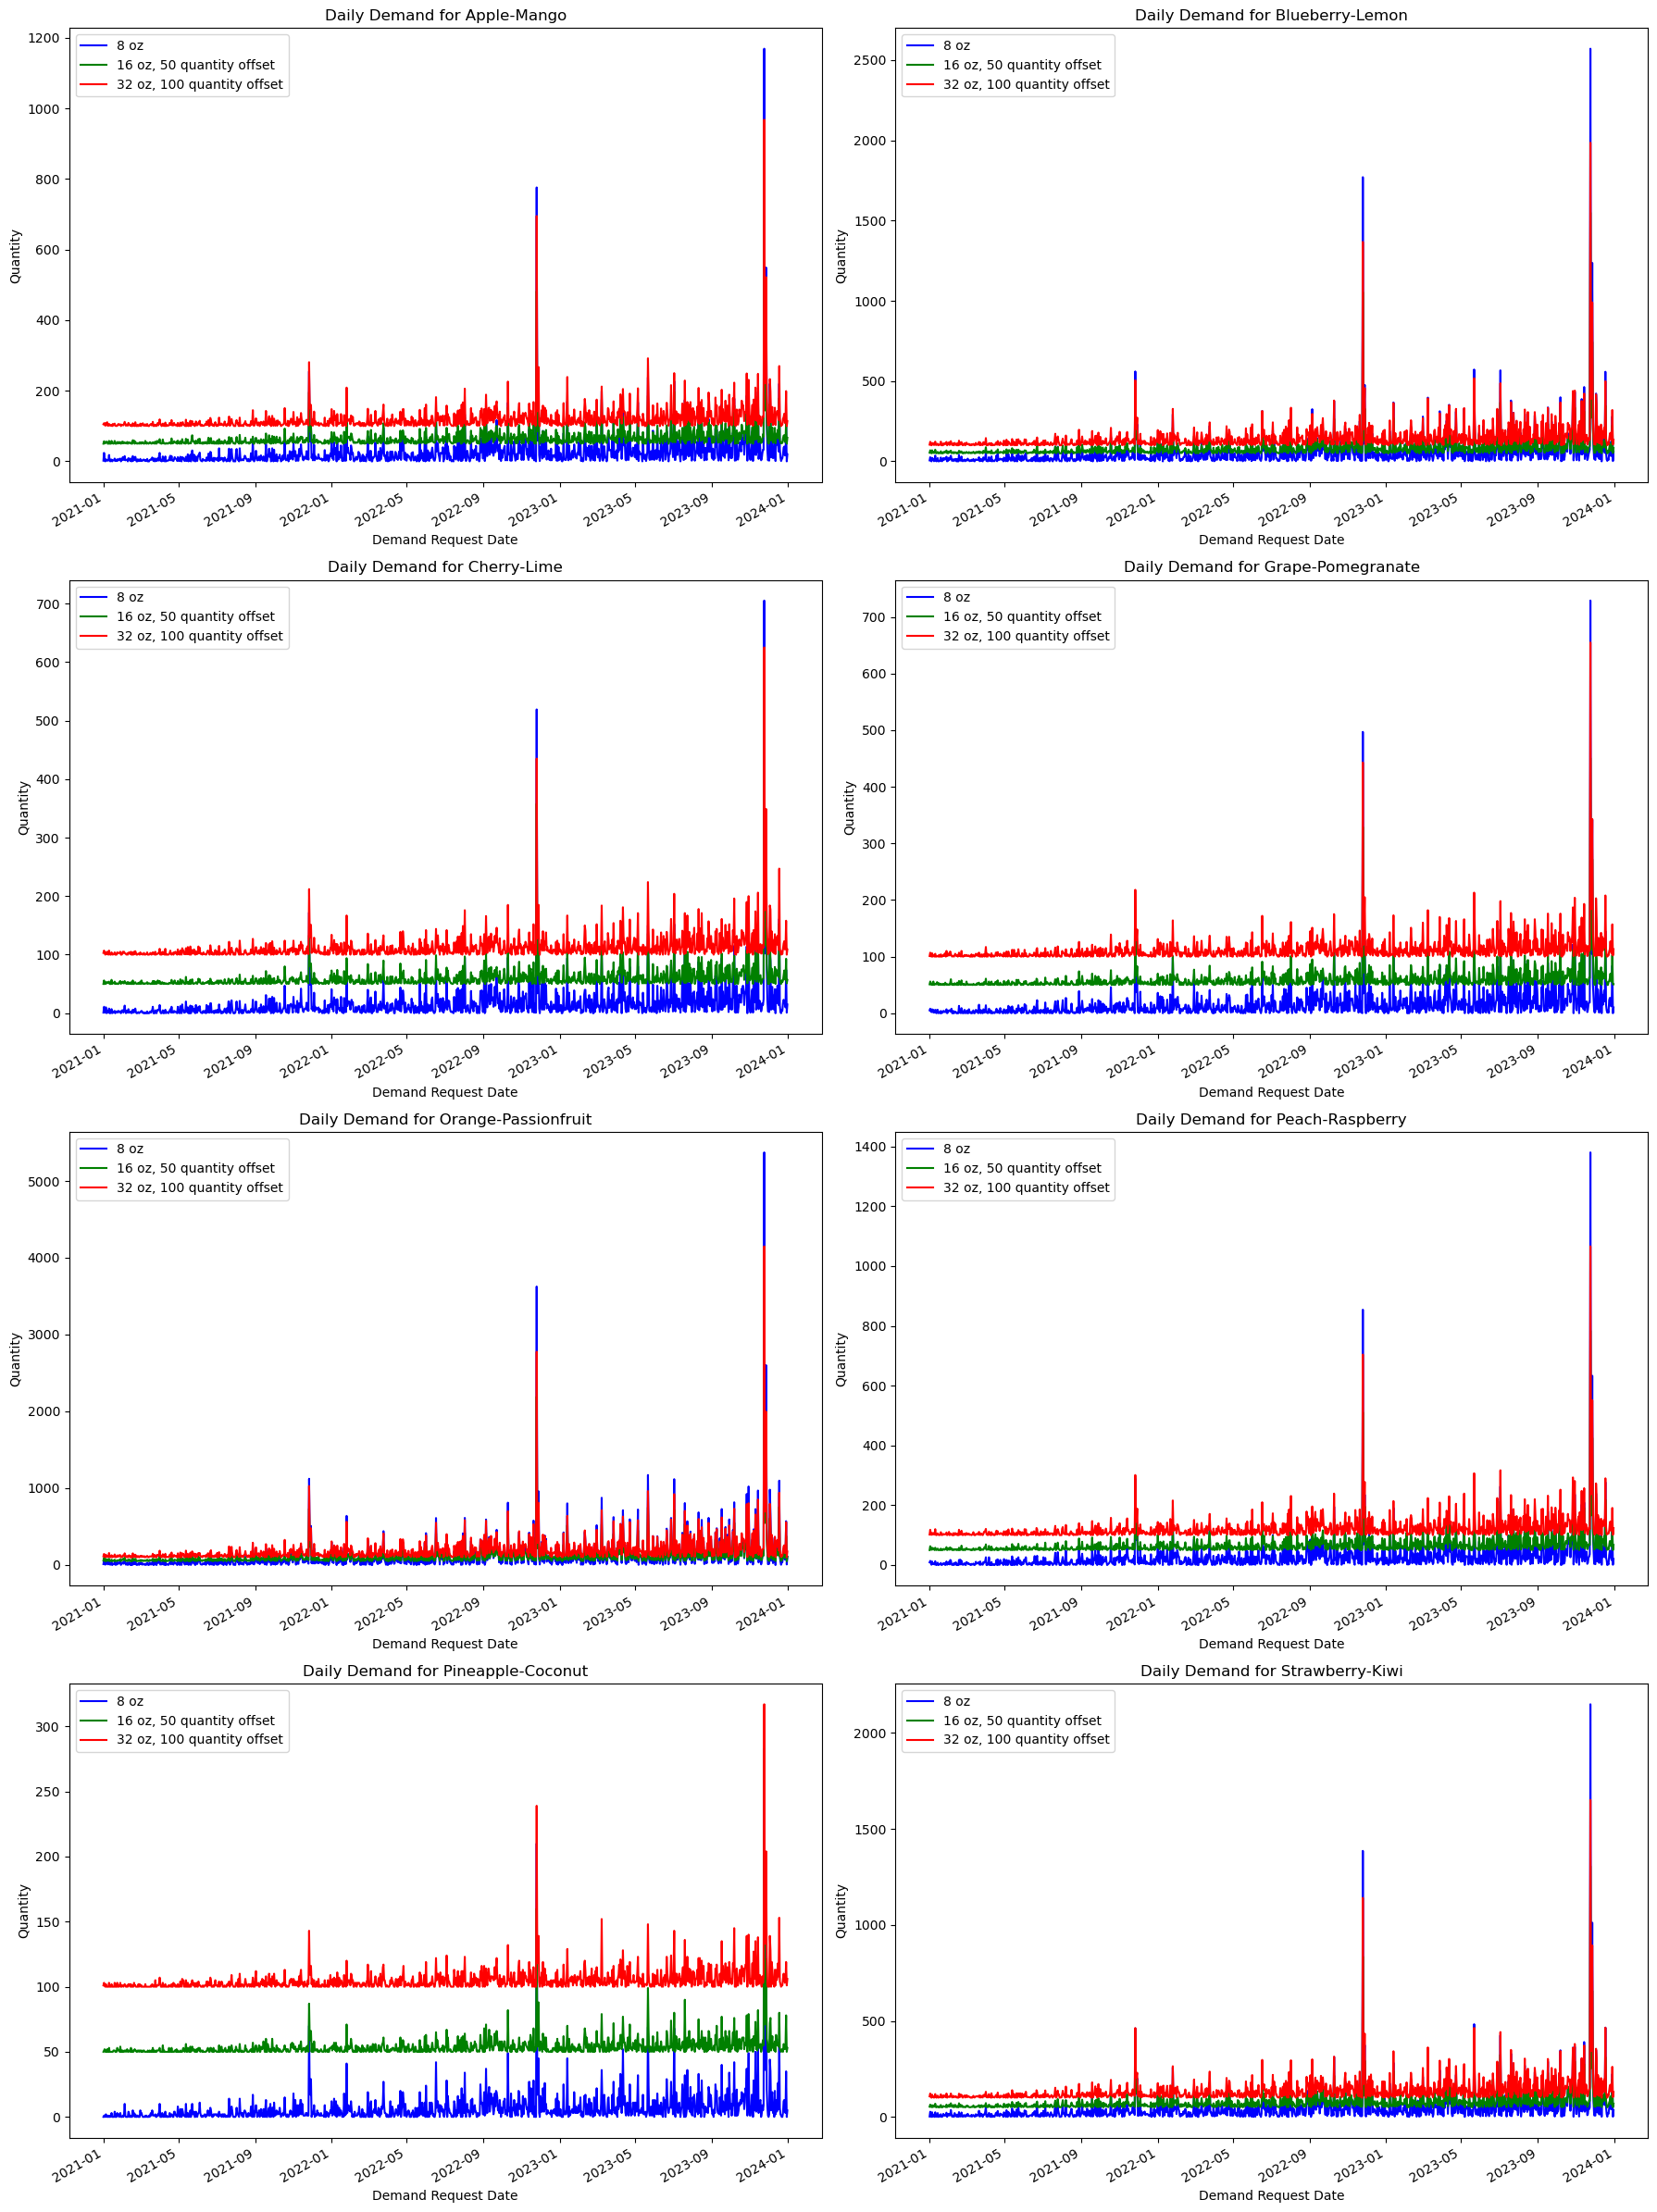

In [4]:
# Make a pivot table for over demand request date
pivot_demand_request_date_by_mix = df_demand_log.pivot_table(index='demandRequest', 
                                        columns=['Mix', 'jarSize'], 
                                        values='Quantity', aggfunc='sum', fill_value=0)

# Create the subplots with a 4x2 structure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define colors for each jar size
colors = ['blue', 'green', 'red']

i = 0
for n, mix in enumerate(pivot_demand_request_date_by_mix.columns.levels[0]):
    # Plot with vertical offsets and specified colors
    pivot_demand_request_date_by_mix[(mix, 8)].add(0).plot(ax=axes[i], label='8 oz', color=colors[0])
    pivot_demand_request_date_by_mix[(mix, 16)].add(50).plot(ax=axes[i], label='16 oz, 50 quantity offset', color=colors[1])
    pivot_demand_request_date_by_mix[(mix, 32)].add(100).plot(ax=axes[i], label='32 oz, 100 quantity offset', color=colors[2])

    # Add labels and title
    axes[i].set_xlabel('Demand Request Date')
    axes[i].set_ylabel('Quantity')
    axes[i].set_title(f'Daily Demand for {mix}')
    axes[i].legend()
    i += 1

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### Earliest, Preferred, and Latest Demand Histories

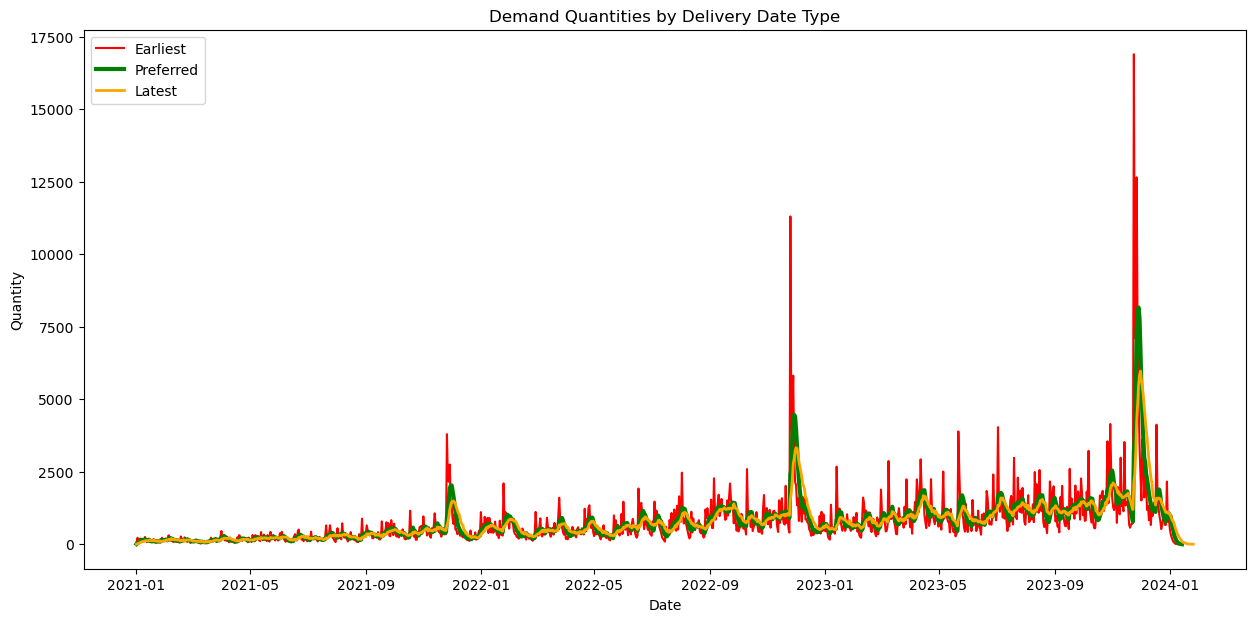

In [6]:
# Create a pivot table indexed by preferred delivery date
pivot_preferred_delivery_date = df_demand_log.pivot_table(index='preferredDelivery', 
                                                        values='Quantity',
                                                        aggfunc='sum', 
                                                        fill_value=0)

pivot_earliest_delivery_date = df_demand_log.pivot_table(index='earliestDelivery', 
                                                        values='Quantity',
                                                        aggfunc='sum', 
                                                        fill_value=0)

pivot_latest_delivery_date = df_demand_log.pivot_table(index='latestDelivery', 
                                                        values='Quantity',
                                                        aggfunc='sum', 
                                                        fill_value=0)

# Plot all three pivot tables on the same graph
plt.figure(figsize=(15, 7))
plt.plot(pivot_earliest_delivery_date.index, pivot_earliest_delivery_date['Quantity'], label='Earliest', color='r')
plt.plot(pivot_preferred_delivery_date.index, pivot_preferred_delivery_date['Quantity'], label='Preferred', linewidth=3, color="g")
plt.plot(pivot_latest_delivery_date.index, pivot_latest_delivery_date['Quantity'], label='Latest', linewidth=2, color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Demand Quantities by Delivery Date Type')
plt.legend()
plt.show()

### Total Demand History

<Axes: xlabel='demandRequest'>

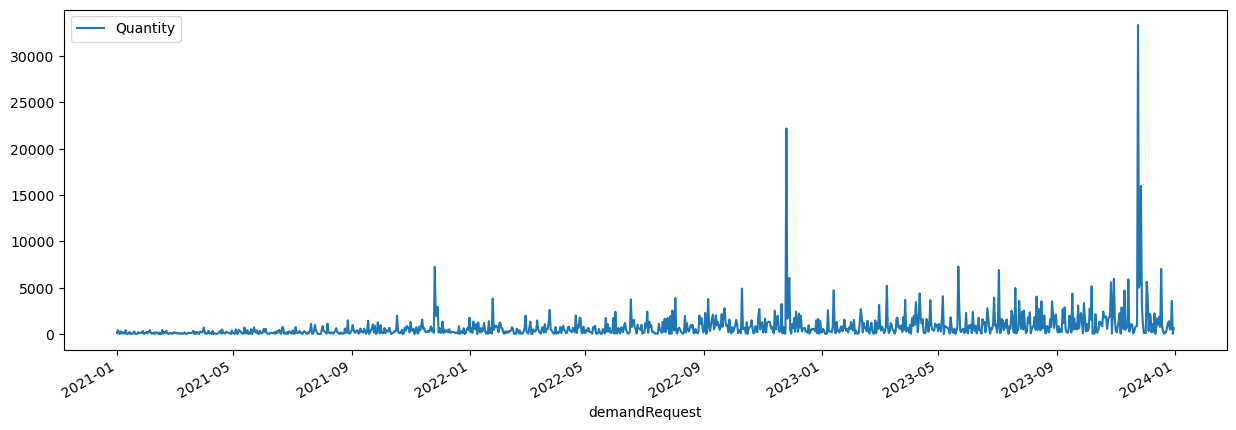

In [8]:
# Make a pivot table for over demand request date
pivot_demand_request_date = df_demand_log.pivot_table(index='demandRequest', 
                                        values='Quantity', aggfunc='sum', fill_value=0)

total_quantity = pivot_demand_request_date['Quantity'].sum()

pivot_demand_request_date.plot(kind='line', figsize=(15, 5))

### Latest Demand History and Averages
Latest Demand has the smoothest curve naturally.

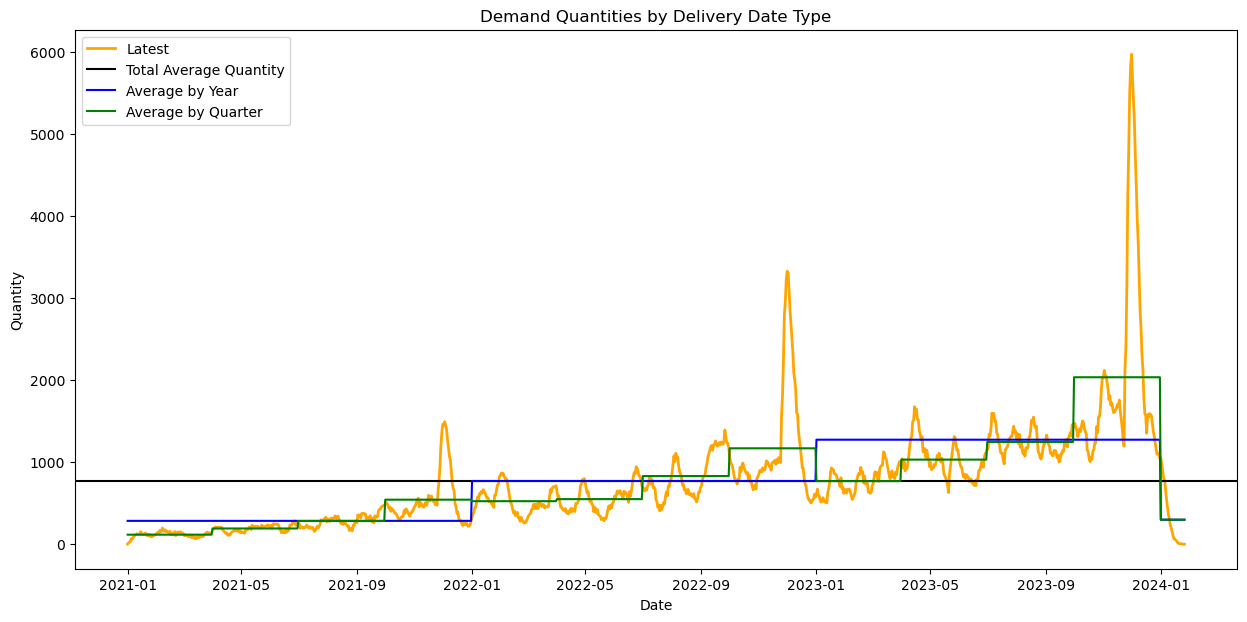

In [9]:
# Convert index to DatetimeIndex
pivot_latest_delivery_date_temp = pivot_latest_delivery_date.copy()
pivot_latest_delivery_date_temp.index = pd.to_datetime(pivot_latest_delivery_date.index)

# Calculate the average quantity for the latest delivery date and note the last day
total_average_quantity = pivot_latest_delivery_date['Quantity'].mean()
last_day = pivot_latest_delivery_date_temp.index[-1]

# Calculate the average quantity for each year and match the last day
average_quantity_by_year = pivot_latest_delivery_date_temp.resample('YE').mean()
average_quantity_by_year.index = average_quantity_by_year.index[:-1].append(pd.to_datetime([last_day]))

# Refine average quantity by year to make a proper line plot
for i in average_quantity_by_year.index:
    year = pd.to_datetime(f'{i.year}-01-01')
    new_row = pd.DataFrame({'Quantity': [average_quantity_by_year.loc[i, 'Quantity']]}, index=[year])
    average_quantity_by_year = pd.concat([average_quantity_by_year, new_row]).sort_index()

# Calculate the average quantity for each quarter
average_quantity_by_quarter = pivot_latest_delivery_date_temp.resample('QE').mean()

# Refine average quantity by quarter to make a proper line plot
for i in average_quantity_by_quarter.index:
    three_months_prior = (i - pd.DateOffset(months=2)).month
    year_month = pd.to_datetime(f'{i.year}-{three_months_prior}-01')
    new_row = pd.DataFrame({'Quantity': [average_quantity_by_quarter.loc[i, 'Quantity']]}, index=[year_month])
    average_quantity_by_quarter = pd.concat([average_quantity_by_quarter, new_row]).sort_index()

average_quantity_by_quarter.index = average_quantity_by_quarter.index[:-1].append(pd.to_datetime([last_day]))

plt.figure(figsize=(15, 7))

plt.plot(pivot_latest_delivery_date.index, pivot_latest_delivery_date['Quantity'], label='Latest', linewidth=2, color='orange')
plt.axhline(y=total_average_quantity, color='black', label='Total Average Quantity')
plt.plot(average_quantity_by_year.index, average_quantity_by_year['Quantity'], label='Average by Year', color='b')
plt.plot(average_quantity_by_quarter.index, average_quantity_by_quarter['Quantity'], label='Average by Quarter', color='g')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Demand Quantities by Delivery Date Type')
plt.legend()
plt.show()

### Other Smoothing
Assigning orders by trying to evenly distribute them over possible delivery dates.

In [12]:
# Create a DataFrame with the same index as df_demand_log and a column of quantities initialized to 0
quantity_table = pd.DataFrame(index=pd.date_range(start=df_demand_log['earliestDelivery'].min(), 
                                                  end=df_demand_log['latestDelivery'].max()), 
                              columns=['Quantity'])
quantity_table['Quantity'] = 0

# Iterate through each row of df_demand_log
for _, row in df_demand_log.iterrows():
    start_date = row['earliestDelivery']
    end_date = row['latestDelivery']
    quantity = row['Quantity']
    
    # Find the date from start_date to end_date that has the lowest quantity in the table of values
    date_range = pd.date_range(start=start_date, end=end_date)
    min_quantity_date = quantity_table.loc[date_range]['Quantity'].idxmin()
    
    # Add the quantity to that spot
    quantity_table.at[min_quantity_date, 'Quantity'] += quantity

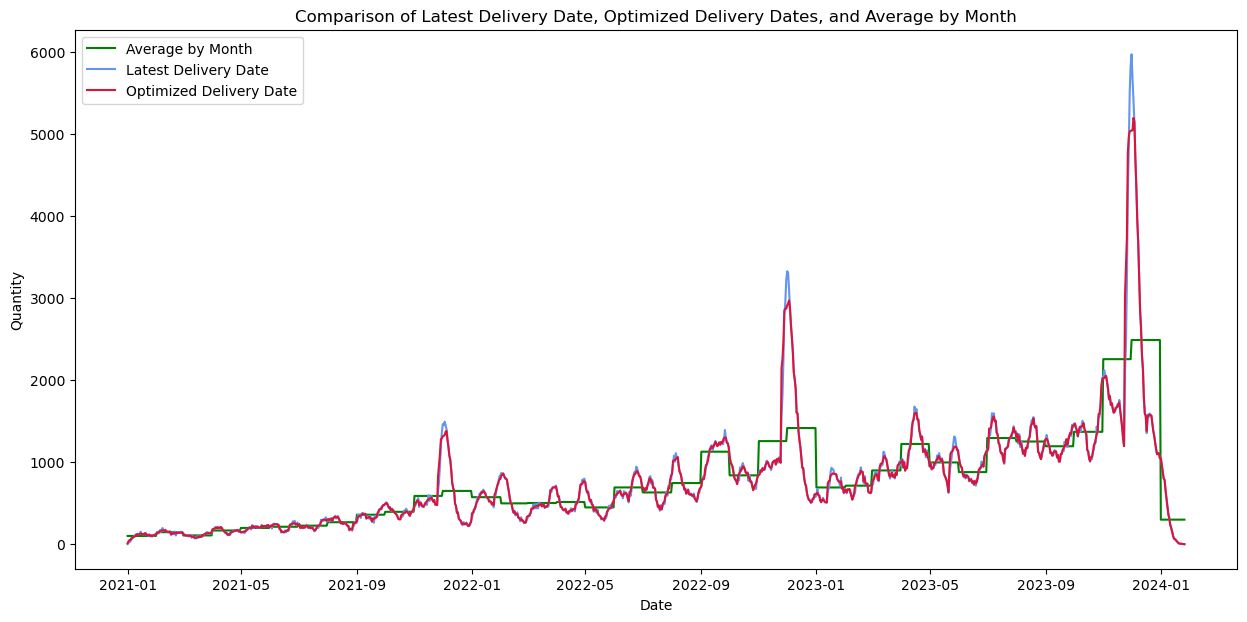

In [13]:
# Convert index to DatetimeIndex
pivot_latest_delivery_date_temp = pivot_latest_delivery_date.copy()
pivot_latest_delivery_date_temp.index = pd.to_datetime(pivot_latest_delivery_date.index)
# Resample the pivot table to monthly
average_quantity_by_month = pivot_latest_delivery_date_temp.resample('ME').mean()

# Refine average quantity by month to make a proper line plot
for i in average_quantity_by_month.index:
    month_start = pd.to_datetime(f'{i.year}-{i.month}-01')
    new_row = pd.DataFrame({'Quantity': [average_quantity_by_month.loc[i, 'Quantity']]}, index=[month_start])
    average_quantity_by_month = pd.concat([average_quantity_by_month, new_row]).sort_index()

average_quantity_by_month.index = average_quantity_by_month.index[:-1].append(pd.to_datetime([last_day]))

plt.figure(figsize=(15, 7))

plt.plot(average_quantity_by_month.index, average_quantity_by_month['Quantity'], label='Average by Month', color='g')
plt.plot(pivot_latest_delivery_date.index, pivot_latest_delivery_date['Quantity'], label='Latest Delivery Date', color='cornflowerblue')
plt.plot(quantity_table.index, quantity_table['Quantity'], label='Optimized Delivery Date', color='crimson')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Comparison of Latest Delivery Date, Optimized Delivery Dates, and Average by Month')
plt.legend()
plt.show()

### State Demand Histories (needs to be made better)

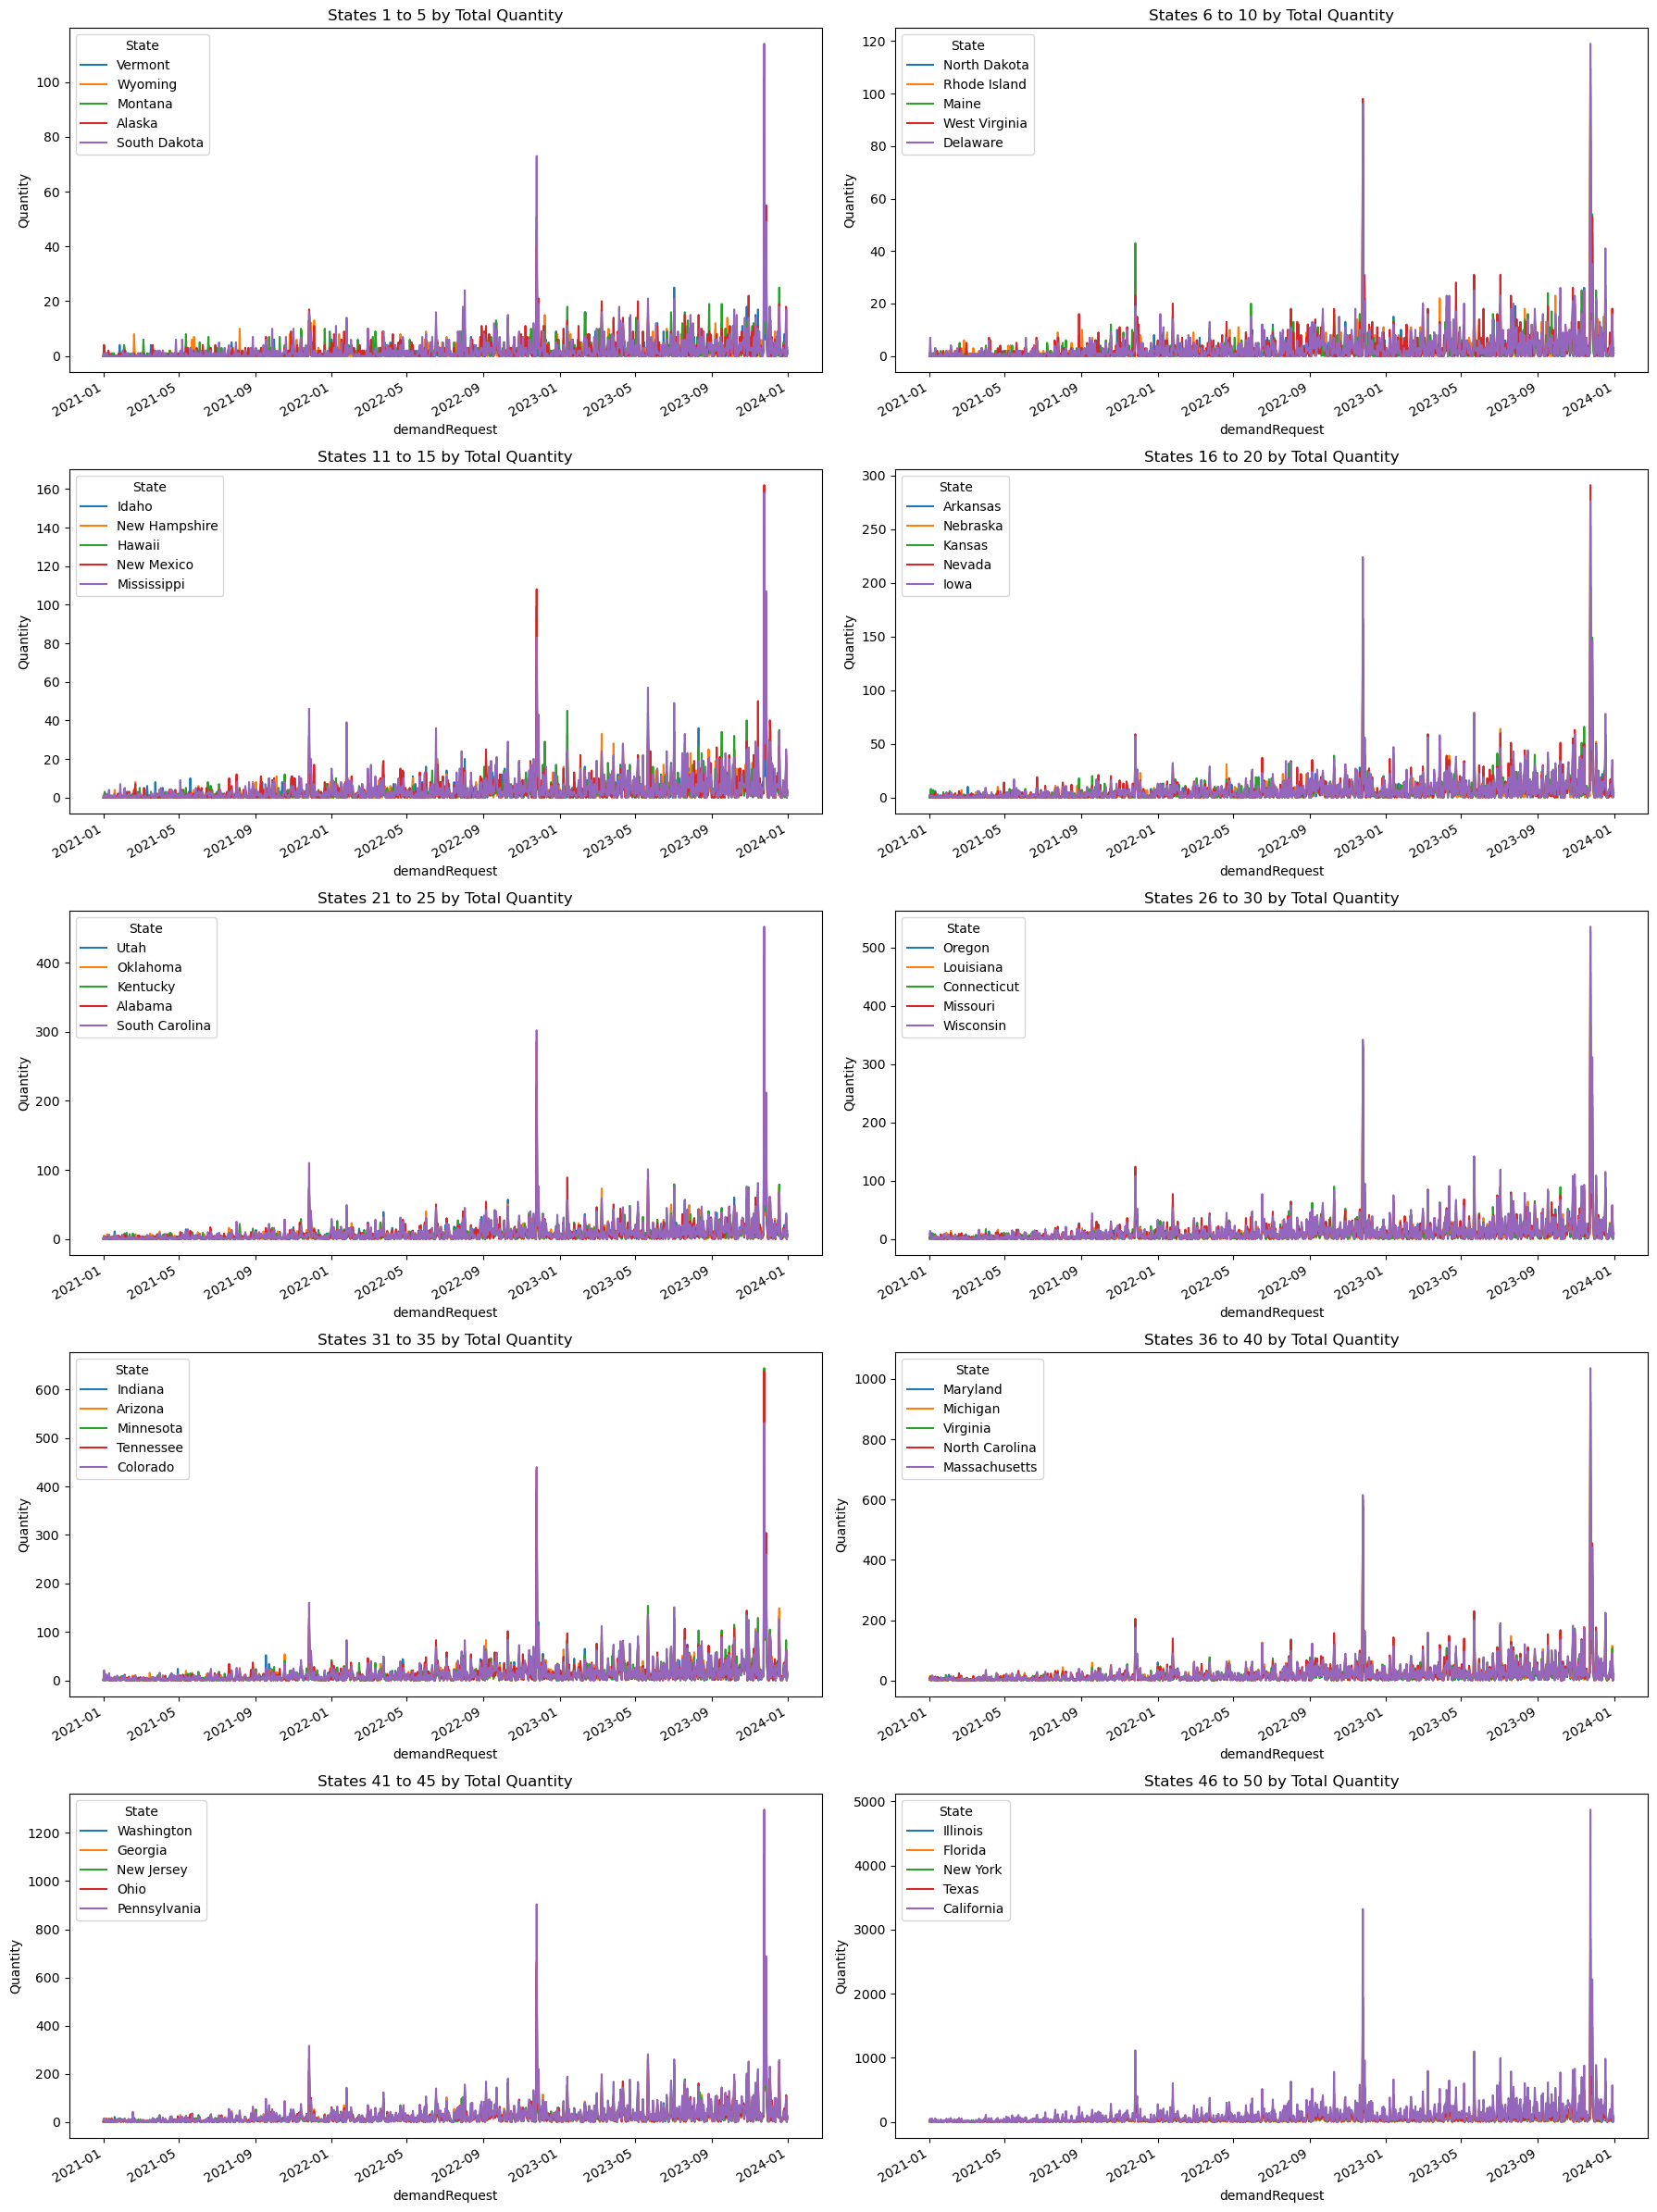

In [14]:
# Create a pivot table indexed by demand request date with all states
pivot_demand_request_date_states = df_demand_log.pivot_table(index='demandRequest', 
                                                             columns='State', 
                                                             values='Quantity', 
                                                             aggfunc='sum', 
                                                             fill_value=0)

# Calculate the total quantity for each state
total_quantity_by_state = pivot_demand_request_date_states.sum()

# Sort the states by total quantity
sorted_states = total_quantity_by_state.sort_values()

# Split the sorted states into chunks of 5
state_chunks = [sorted_states[i:i + 5].index for i in range(0, len(sorted_states), 5)]

# Create the subplots with a 5x2 structure
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each chunk of states
for i, chunk in enumerate(state_chunks):
    pivot_demand_request_date_states[chunk].plot(ax=axes[i])
    axes[i].set_title(f'States {i*5+1} to {i*5+5} by Total Quantity')
    axes[i].set_xlabel('demandRequest')
    axes[i].set_ylabel('Quantity')
    axes[i].legend(title='State')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

# Task 2

In [15]:
# Create a pivot table with references to plot later
pivot_demand_request_date = df_demand_log.pivot_table(index='demandRequest', values='Quantity', aggfunc='sum')
pivot_demand_request_date['Day of Week'] = pivot_demand_request_date.index.day_name()
pivot_demand_request_date['Week Number'] = (pivot_demand_request_date.index - pivot_demand_request_date.index.min()).days // 7 + 1
pivot_demand_request_date['Month Number'] = (pivot_demand_request_date.index.year - pivot_demand_request_date.index.min().year) * 12 + pivot_demand_request_date.index.month
pivot_demand_request_date

Quantity Day of Week  Week Number  Month Number
demandRequest                                                 
2021-01-01           90      Friday            1             1
2021-01-02          420    Saturday            1             1
2021-01-03          178      Sunday            1             1
2021-01-04           16      Monday            1             1
2021-01-05          294     Tuesday            1             1
...                 ...         ...          ...           ...
2023-12-27          496   Wednesday          156            36
2023-12-28          574    Thursday          156            36
2023-12-29         3568      Friday          157            36
2023-12-30           33    Saturday          157            36
2023-12-31          632      Sunday          157            36

[1093 rows x 4 columns]

The code below shows that the November Cyber Week promotion brings in a lot of demand. They must also have a promotion around May, and possibly July.

In [16]:
# Find the top 20 demand request dates with the highest quantity
top_20_demand_dates = pivot_demand_request_date.nlargest(20, 'Quantity')
top_20_demand_dates

Quantity Day of Week  Week Number  Month Number
demandRequest                                                 
2023-11-24        33324      Friday          152            35
2022-11-25        22162      Friday          100            23
2023-11-27        15975      Monday          152            35
2023-05-22         7279      Monday          125            29
2021-11-26         7244      Friday           48            11
2023-12-18         7030      Monday          155            36
2023-07-03         6902      Monday          131            31
2022-11-28         6048      Monday          100            23
2023-10-30         5959      Monday          148            34
2023-11-14         5906     Tuesday          150            35
2023-12-03         5649      Sunday          153            36
2023-10-27         5574      Friday          148            34
2023-11-26         5502      Sunday          152            35
2023-03-09         5209    Thursday          114            27
2023-10-07         5149    Saturday          145            34
2023-11-25         5014    Saturday          152            35
2023-07-20         4965    Thursday          133            31
2022-10-10         4910      Monday           93            22
2023-01-13         4728      Friday          107            25
2023-11-10         4705      Friday          150            35

Here we are looking at the day of week seasonality. Friday and Monday have the most.

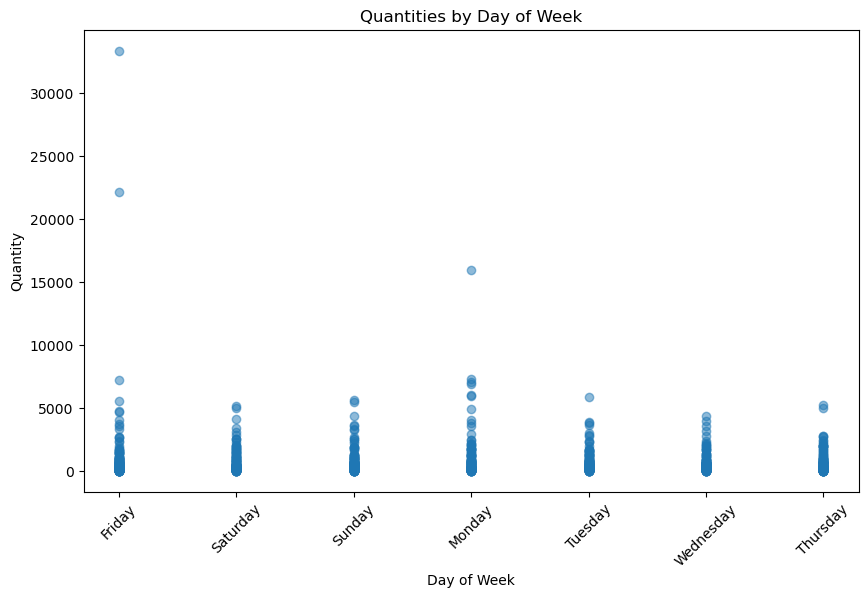

In [17]:
# Plot the days of week with their quantities on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pivot_demand_request_date['Day of Week'], pivot_demand_request_date['Quantity'], alpha=0.5)
plt.title('Quantities by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
#plt.grid(True)
plt.show()

This code first replaces the three outliers above with quantities similar to the other values, then takes the average of all days of the week. Still, Friday and Monday have the most demand, while Wednesday and Thursday have the least. 

In [18]:
pivot_demand_request_date_copy = pivot_demand_request_date.copy()
# Set the highest three values for pivot_demand_request_date_copy to have quantities equal to 7200, approximately the fourth highest value
pivot_demand_request_date_copy.loc[pivot_demand_request_date_copy['Quantity'].nlargest(3).index, 'Quantity'] = 7200
pivot_avg_quantity_by_day_of_week = pivot_demand_request_date_copy.pivot_table(index='Day of Week', values='Quantity', aggfunc='mean')
pivot_avg_quantity_by_day_of_week

Quantity
Day of Week            
Friday       871.566879
Monday       911.807692
Saturday     726.820513
Sunday       716.847134
Thursday     646.641026
Tuesday      702.333333
Wednesday    605.245161

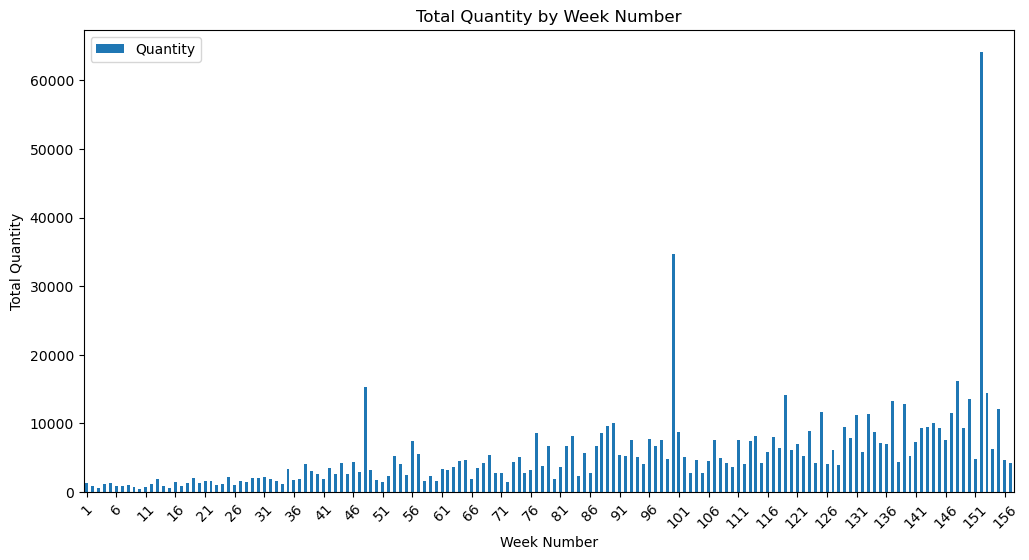

In [19]:
pivot_demand_by_week_number = pivot_demand_request_date.pivot_table(index='Week Number', values='Quantity', aggfunc='sum')
pivot_demand_by_week_number.plot(kind='bar', figsize=(12, 6))
plt.title('Total Quantity by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Total Quantity')
plt.xticks(ticks=range(0, len(pivot_demand_by_week_number), 5), labels=range(1, len(pivot_demand_by_week_number) + 1, 5), rotation=45)
plt.show()

Besides the obvious spike in November in all years, there is a drop-rise in February-March and May-June for 2022 and February-March and June-July in 2023.

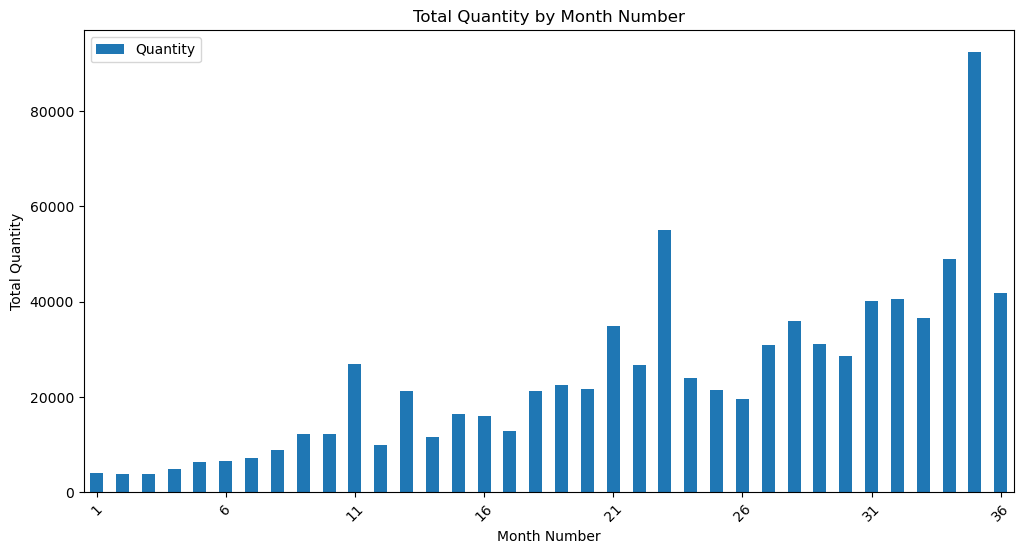

In [20]:
pivot_demand_by_month_number = pivot_demand_request_date.pivot_table(index='Month Number', values='Quantity', aggfunc='sum')
pivot_demand_by_month_number.plot(kind='bar', figsize=(12, 6))
plt.title('Total Quantity by Month Number')
plt.xlabel('Month Number')
plt.ylabel('Total Quantity')
plt.xticks(ticks=range(0, len(pivot_demand_by_month_number), 5), labels=range(1, len(pivot_demand_by_month_number) + 1, 5), rotation=45)
plt.show()

# Task 3

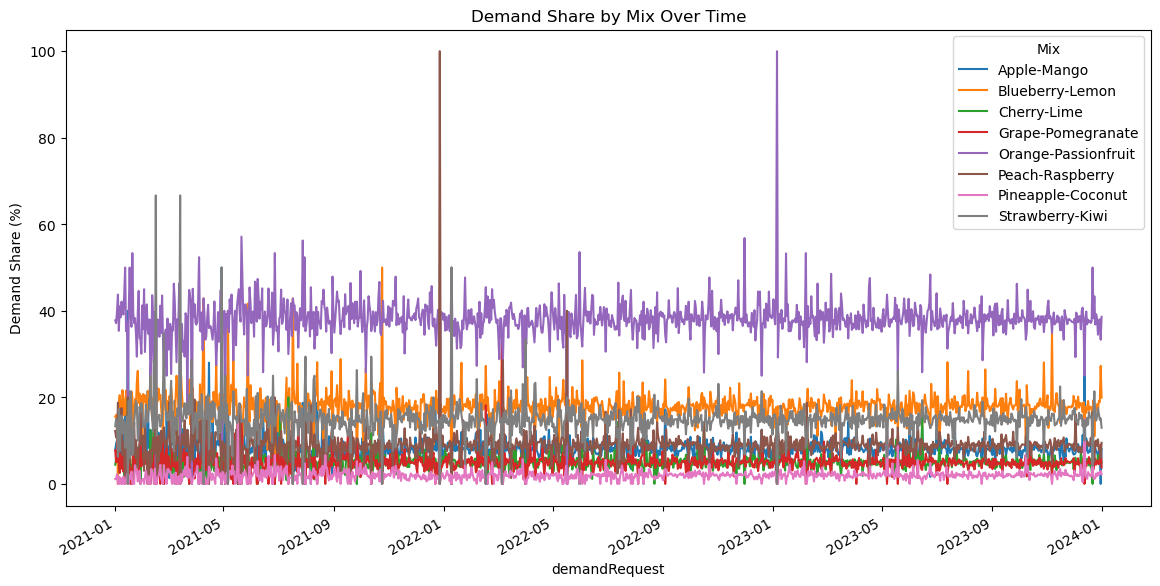

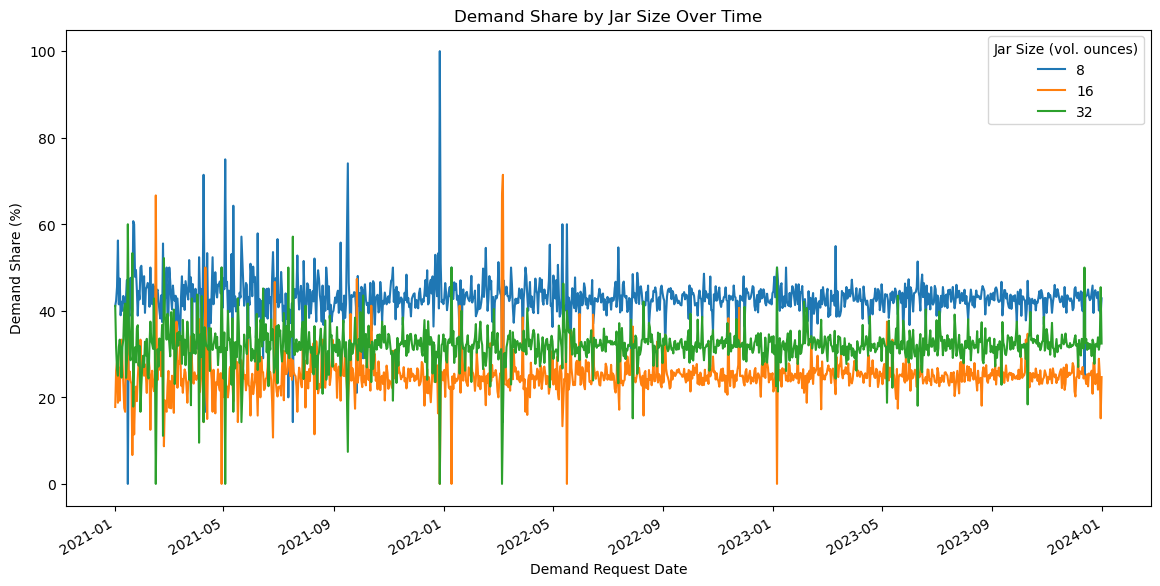

In [21]:
# Create a pivot table with index 'Demand Request Date' and columns 'Mix' and 'jarSize'
pivot_product_quantities_shares = df_demand_log.pivot_table(index='demandRequest',
                                                     columns=['Mix', 'jarSize'],
                                                     values='Quantity', aggfunc='sum', fill_value=0)

# Normalize the quantities to be the percentage of total quantity among each row
pivot_product_quantities_shares = pivot_product_quantities_shares.div(pivot_product_quantities_shares.sum(axis=1), axis=0) * 100

# Create a pivot table with index 'demandRequest' and columns 'Mix'
pivot_mixes_shares = pivot_product_quantities_shares.T.groupby(level=0).sum().T

# Create a pivot table with index 'demandRequest' and columns 'jarSize'
pivot_jar_sizes_shares = pivot_product_quantities_shares.T.groupby(level=1).sum().T

# Plot the pivot table for mixes shares
pivot_mixes_shares.plot(kind='line', figsize=(14, 7))
plt.title('Demand Share by Mix Over Time')
plt.xlabel('demandRequest')
plt.ylabel('Demand Share (%)')
plt.legend(title='Mix')
plt.show()

# Plot the pivot table for jar sizes shares
pivot_jar_sizes_shares.plot(kind='line', figsize=(14, 7))
plt.title('Demand Share by Jar Size Over Time')
plt.xlabel('Demand Request Date')
plt.ylabel('Demand Share (%)')
plt.legend(title='Jar Size (vol. ounces)')
plt.show()

The obvious winner is Orange-Passionfruit for mixes and the 8oz jar size for demand share. Both graphs tend to have a bit more fluctuation in 2021, but are mostly constant in average through the three years. Nothing seems to be increasing or decreasing in demand share.

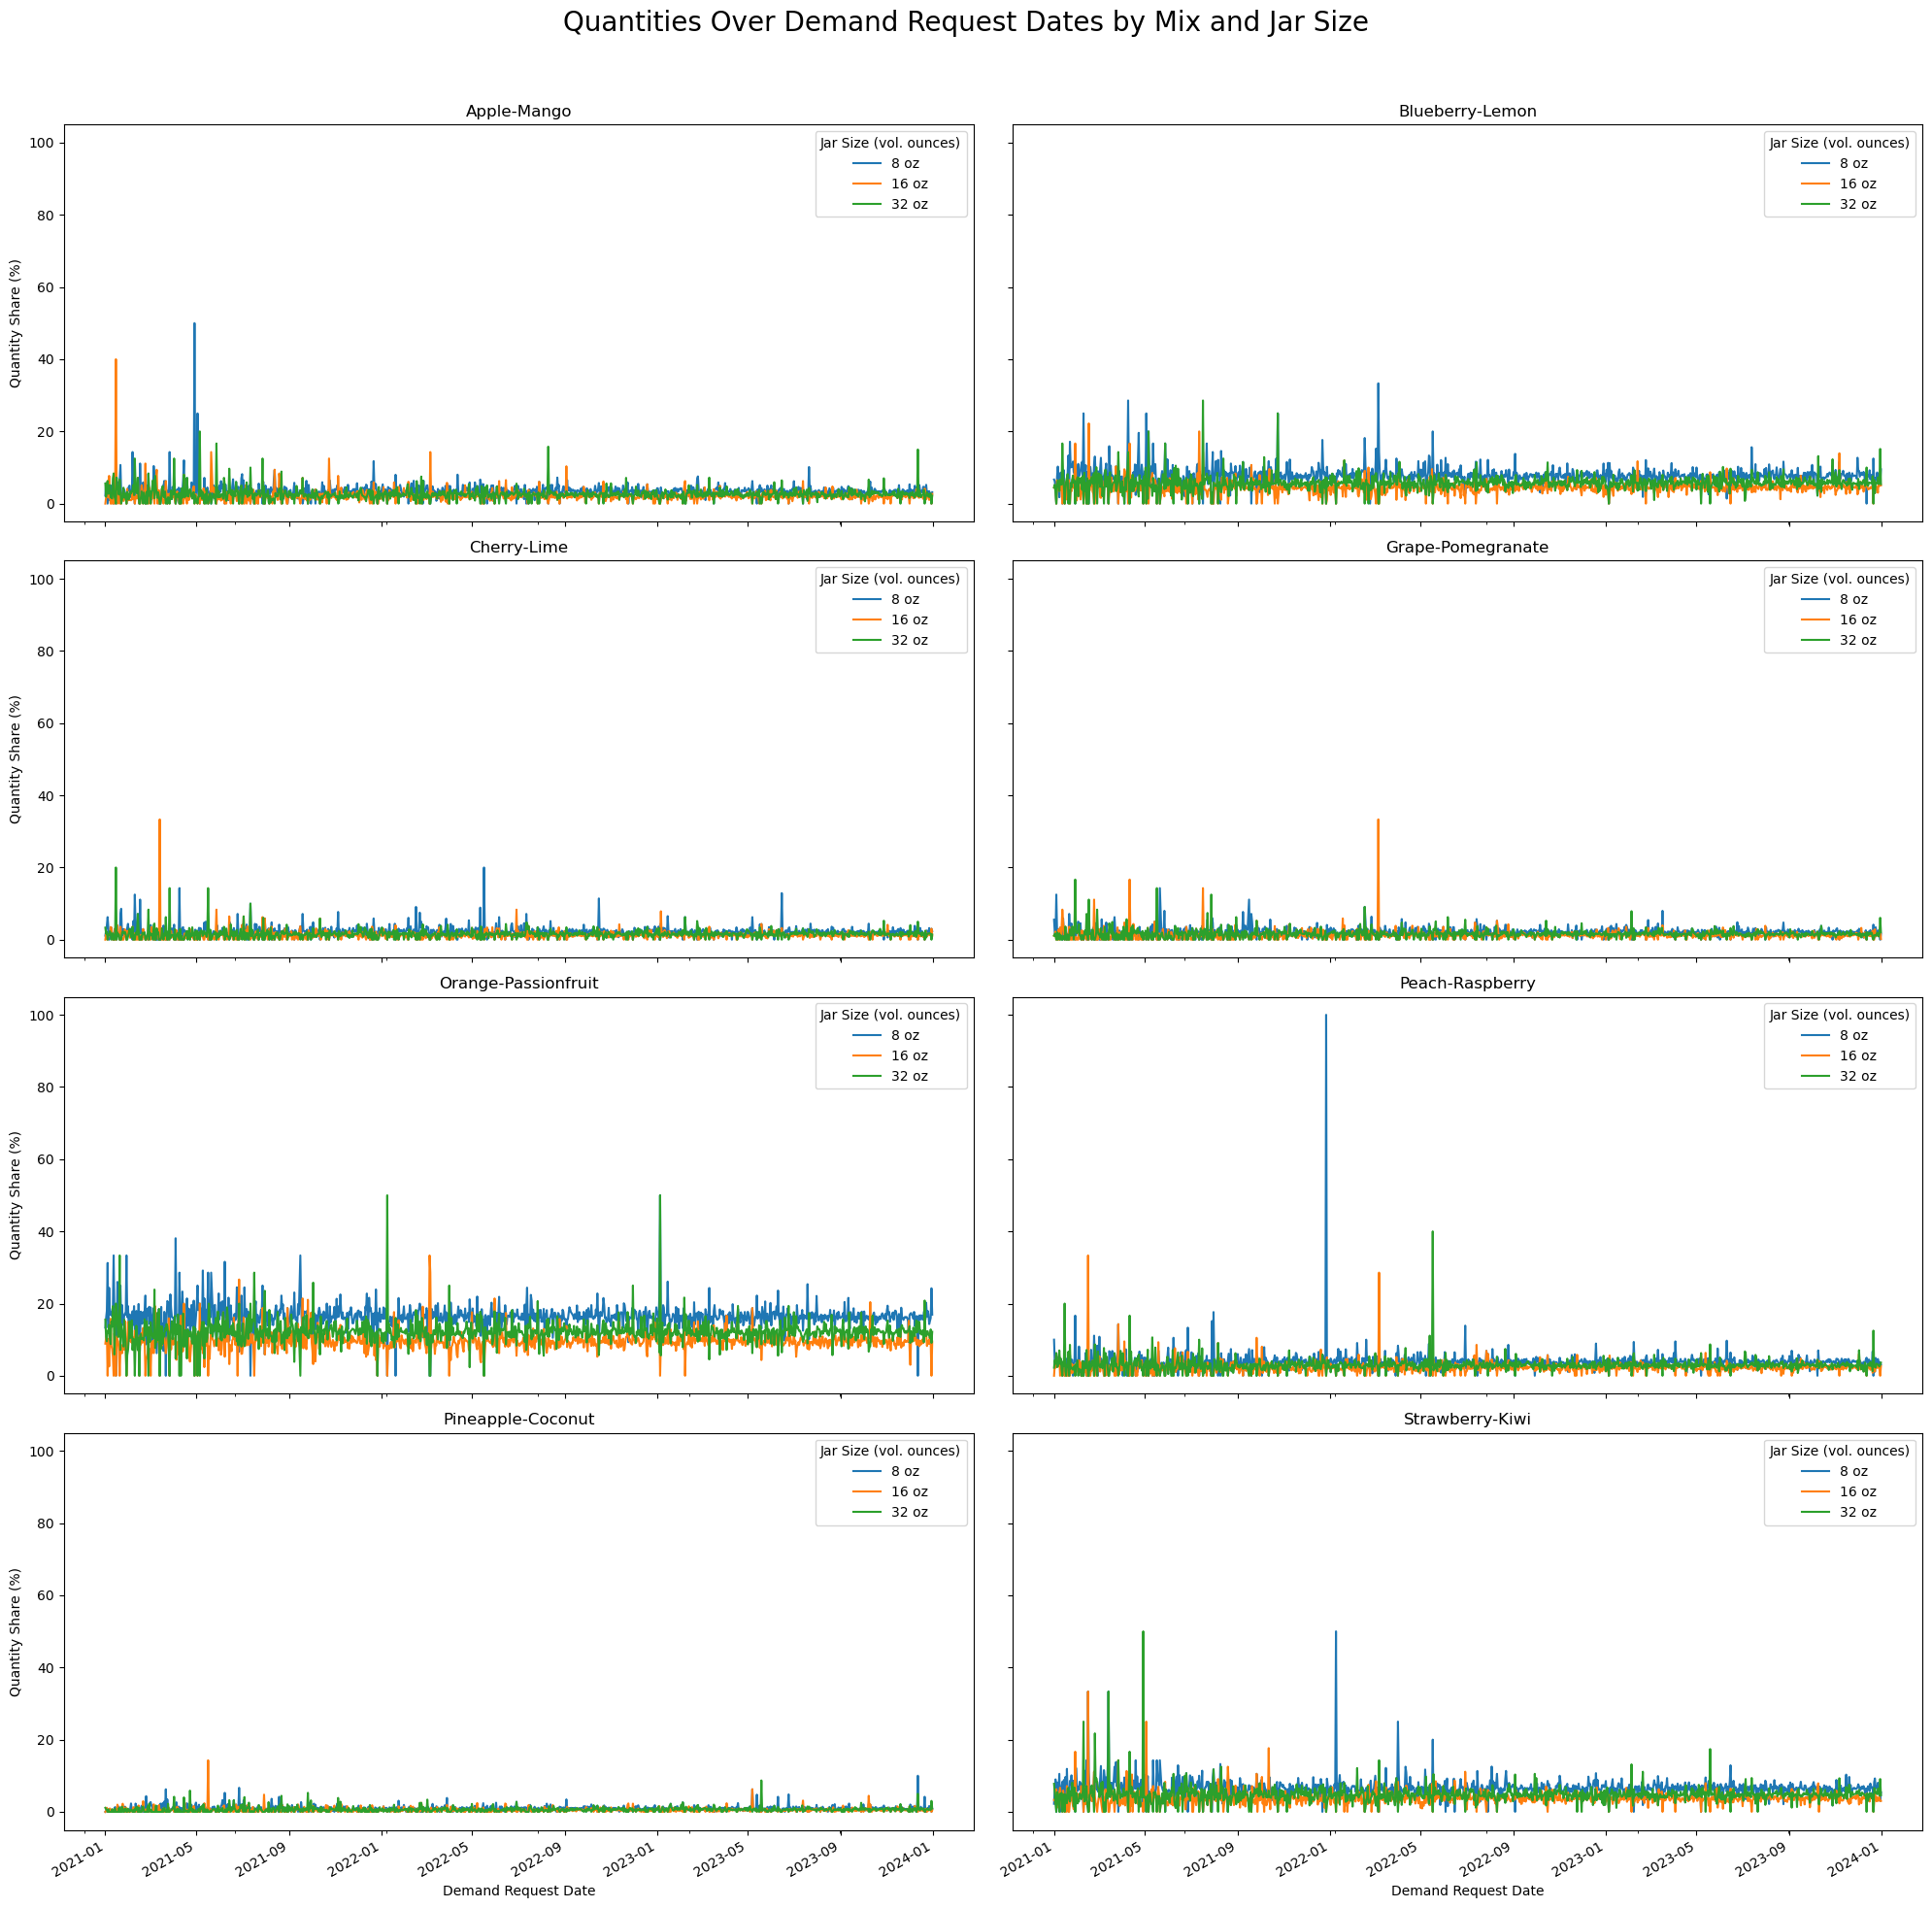

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle('Quantities Over Demand Request Dates by Mix and Jar Size', fontsize=20)

mixes = ['Apple-Mango', 'Blueberry-Lemon', 'Cherry-Lime', 'Grape-Pomegranate', 'Orange-Passionfruit', 'Peach-Raspberry', 'Pineapple-Coconut', 'Strawberry-Kiwi']
jar_sizes = [8, 16, 32]

for ax, mix in zip(axes.flatten(), mixes):
    for jar_size in jar_sizes:
        pivot_product_quantities_shares[(mix, jar_size)].plot(kind='line', ax=ax, label=f'{jar_size} oz')
    ax.set_title(mix)
    ax.set_xlabel('Demand Request Date')
    ax.set_ylabel('Quantity Share (%)')
    ax.legend(title='Jar Size (vol. ounces)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Task 4

These graphs show the total demand share by state.

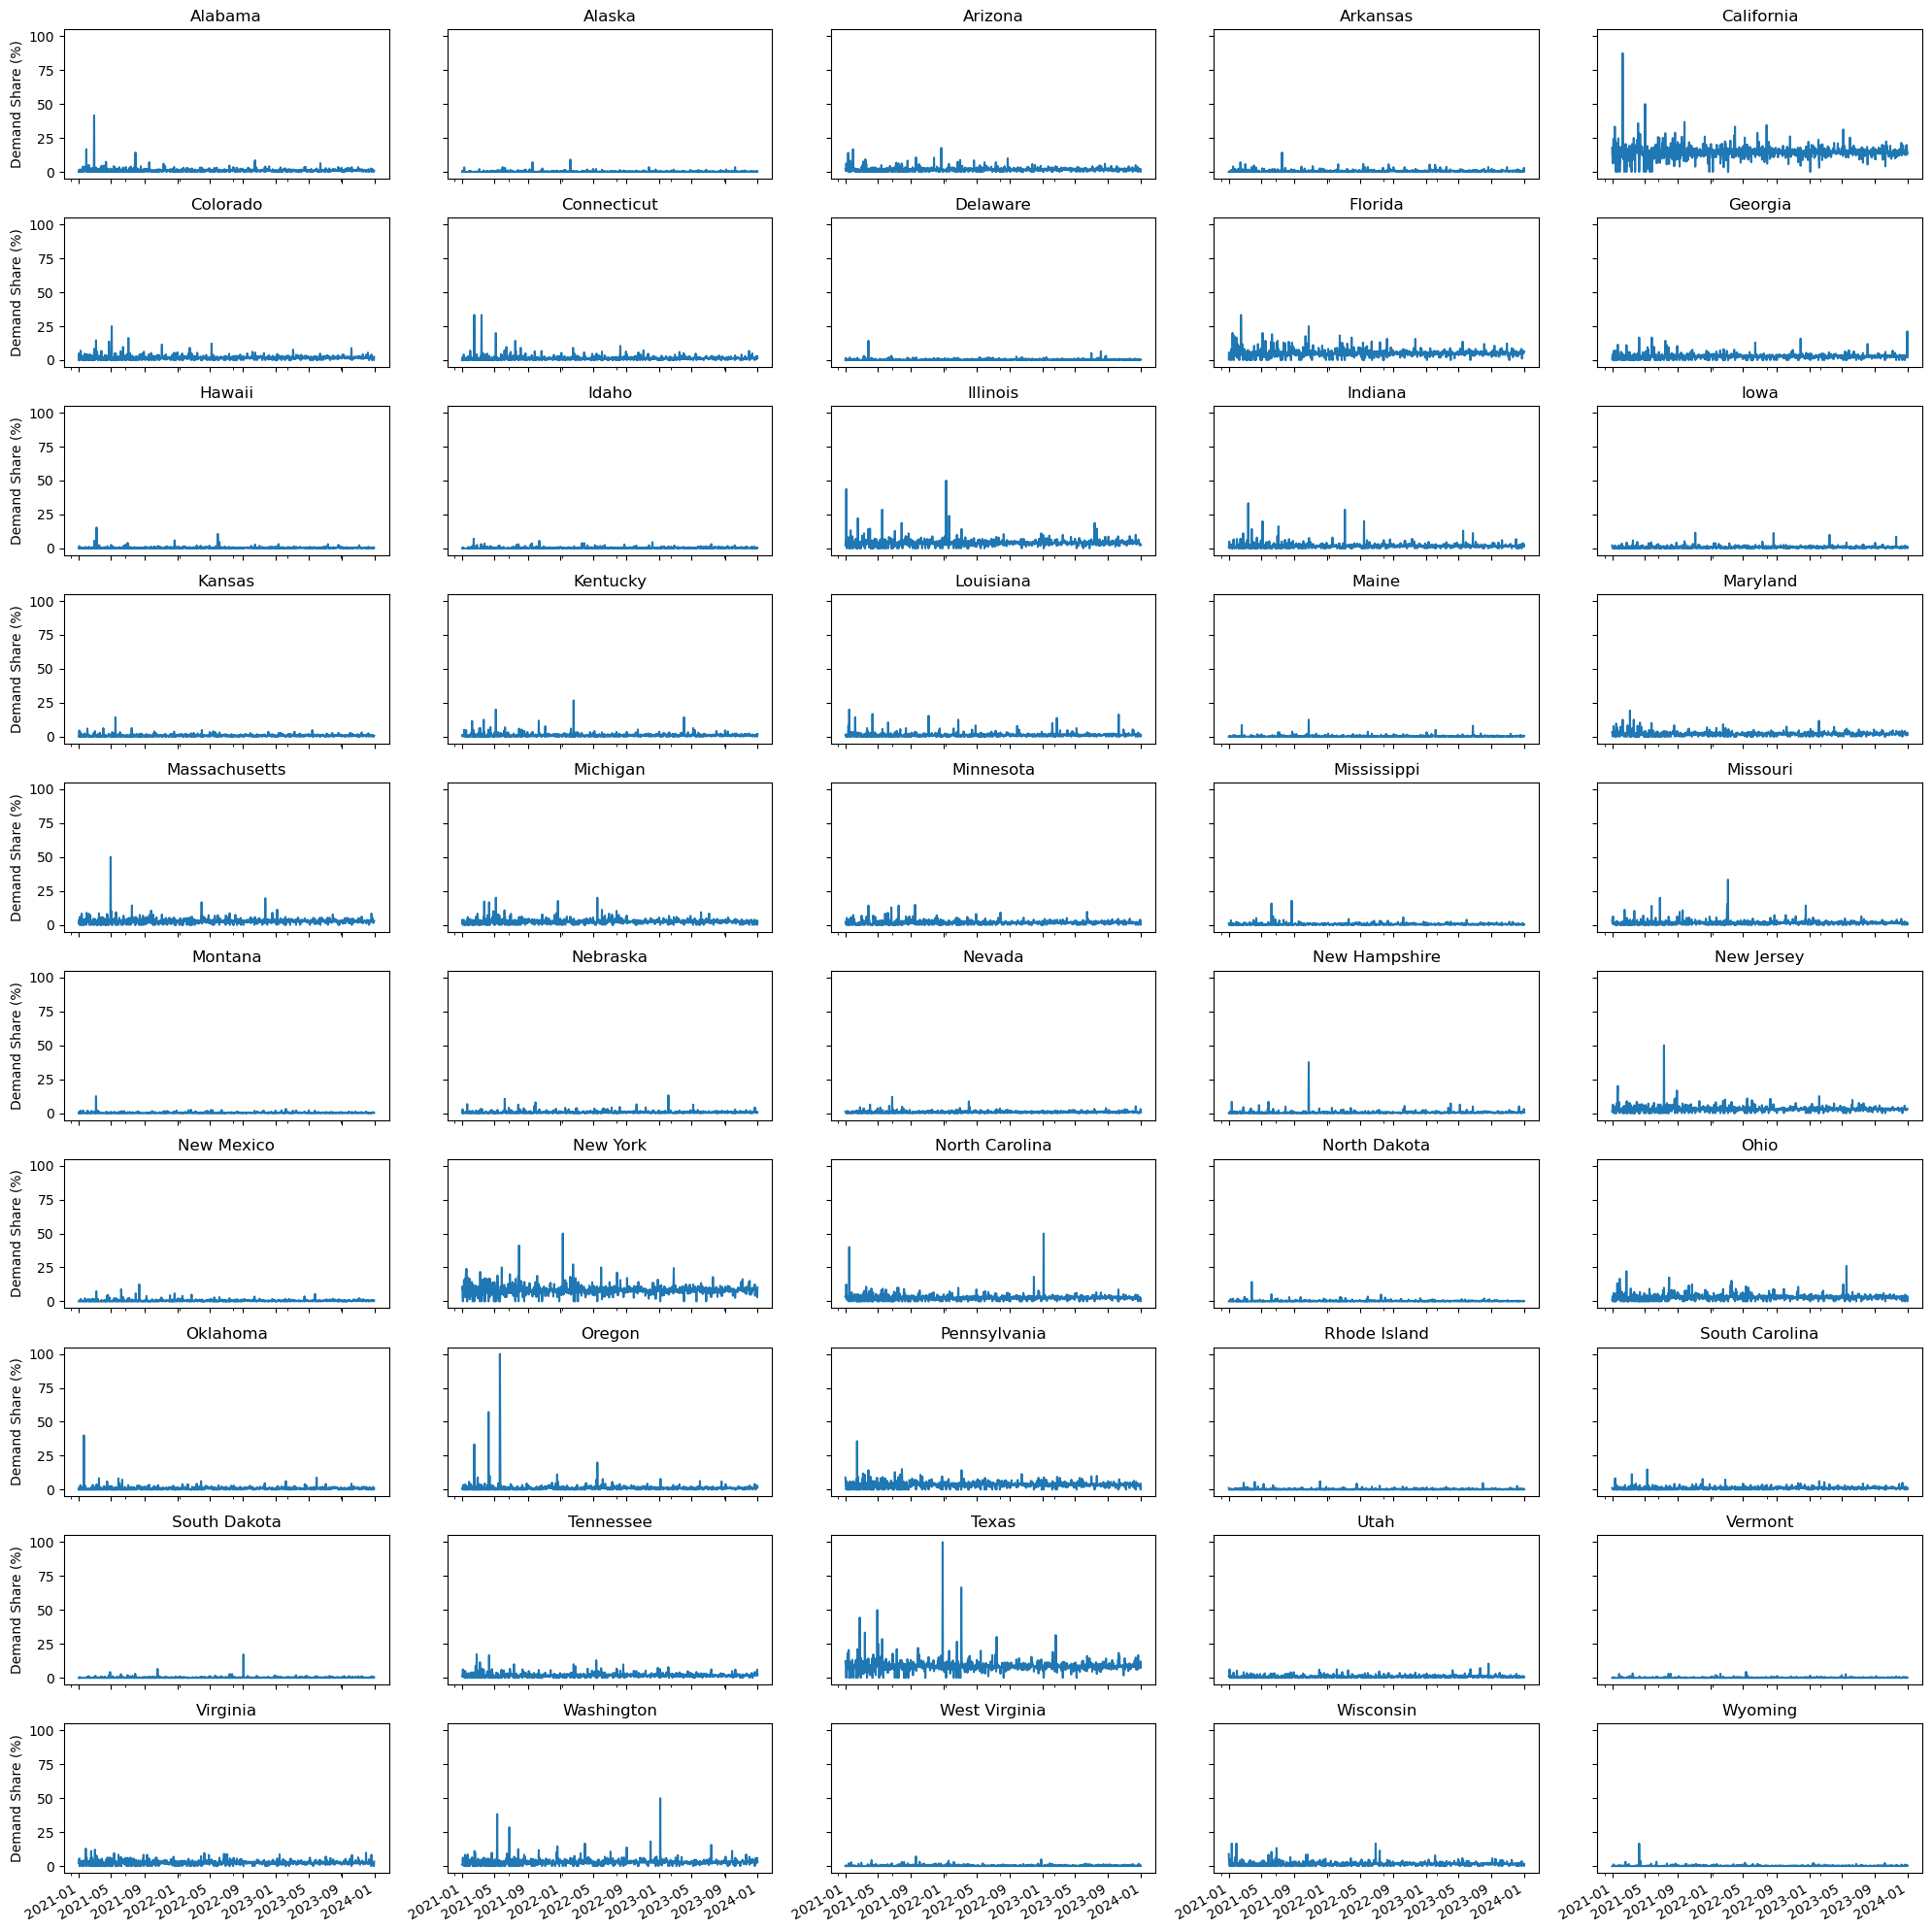

In [23]:
pivot_demand_by_state = df_demand_log.pivot_table(index='demandRequest', columns='State', values='Quantity', aggfunc='sum', fill_value=0)
pivot_demand_share_by_state = pivot_demand_by_state.div(pivot_demand_by_state.sum(axis=1), axis=0) * 100
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20, 20), sharex=True, sharey=True)
axes = axes.flatten()

for i, state in enumerate(pivot_demand_share_by_state.columns):
    pivot_demand_share_by_state[state].plot(ax=axes[i], title=state)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Demand Share (%)')

plt.tight_layout()
plt.show()

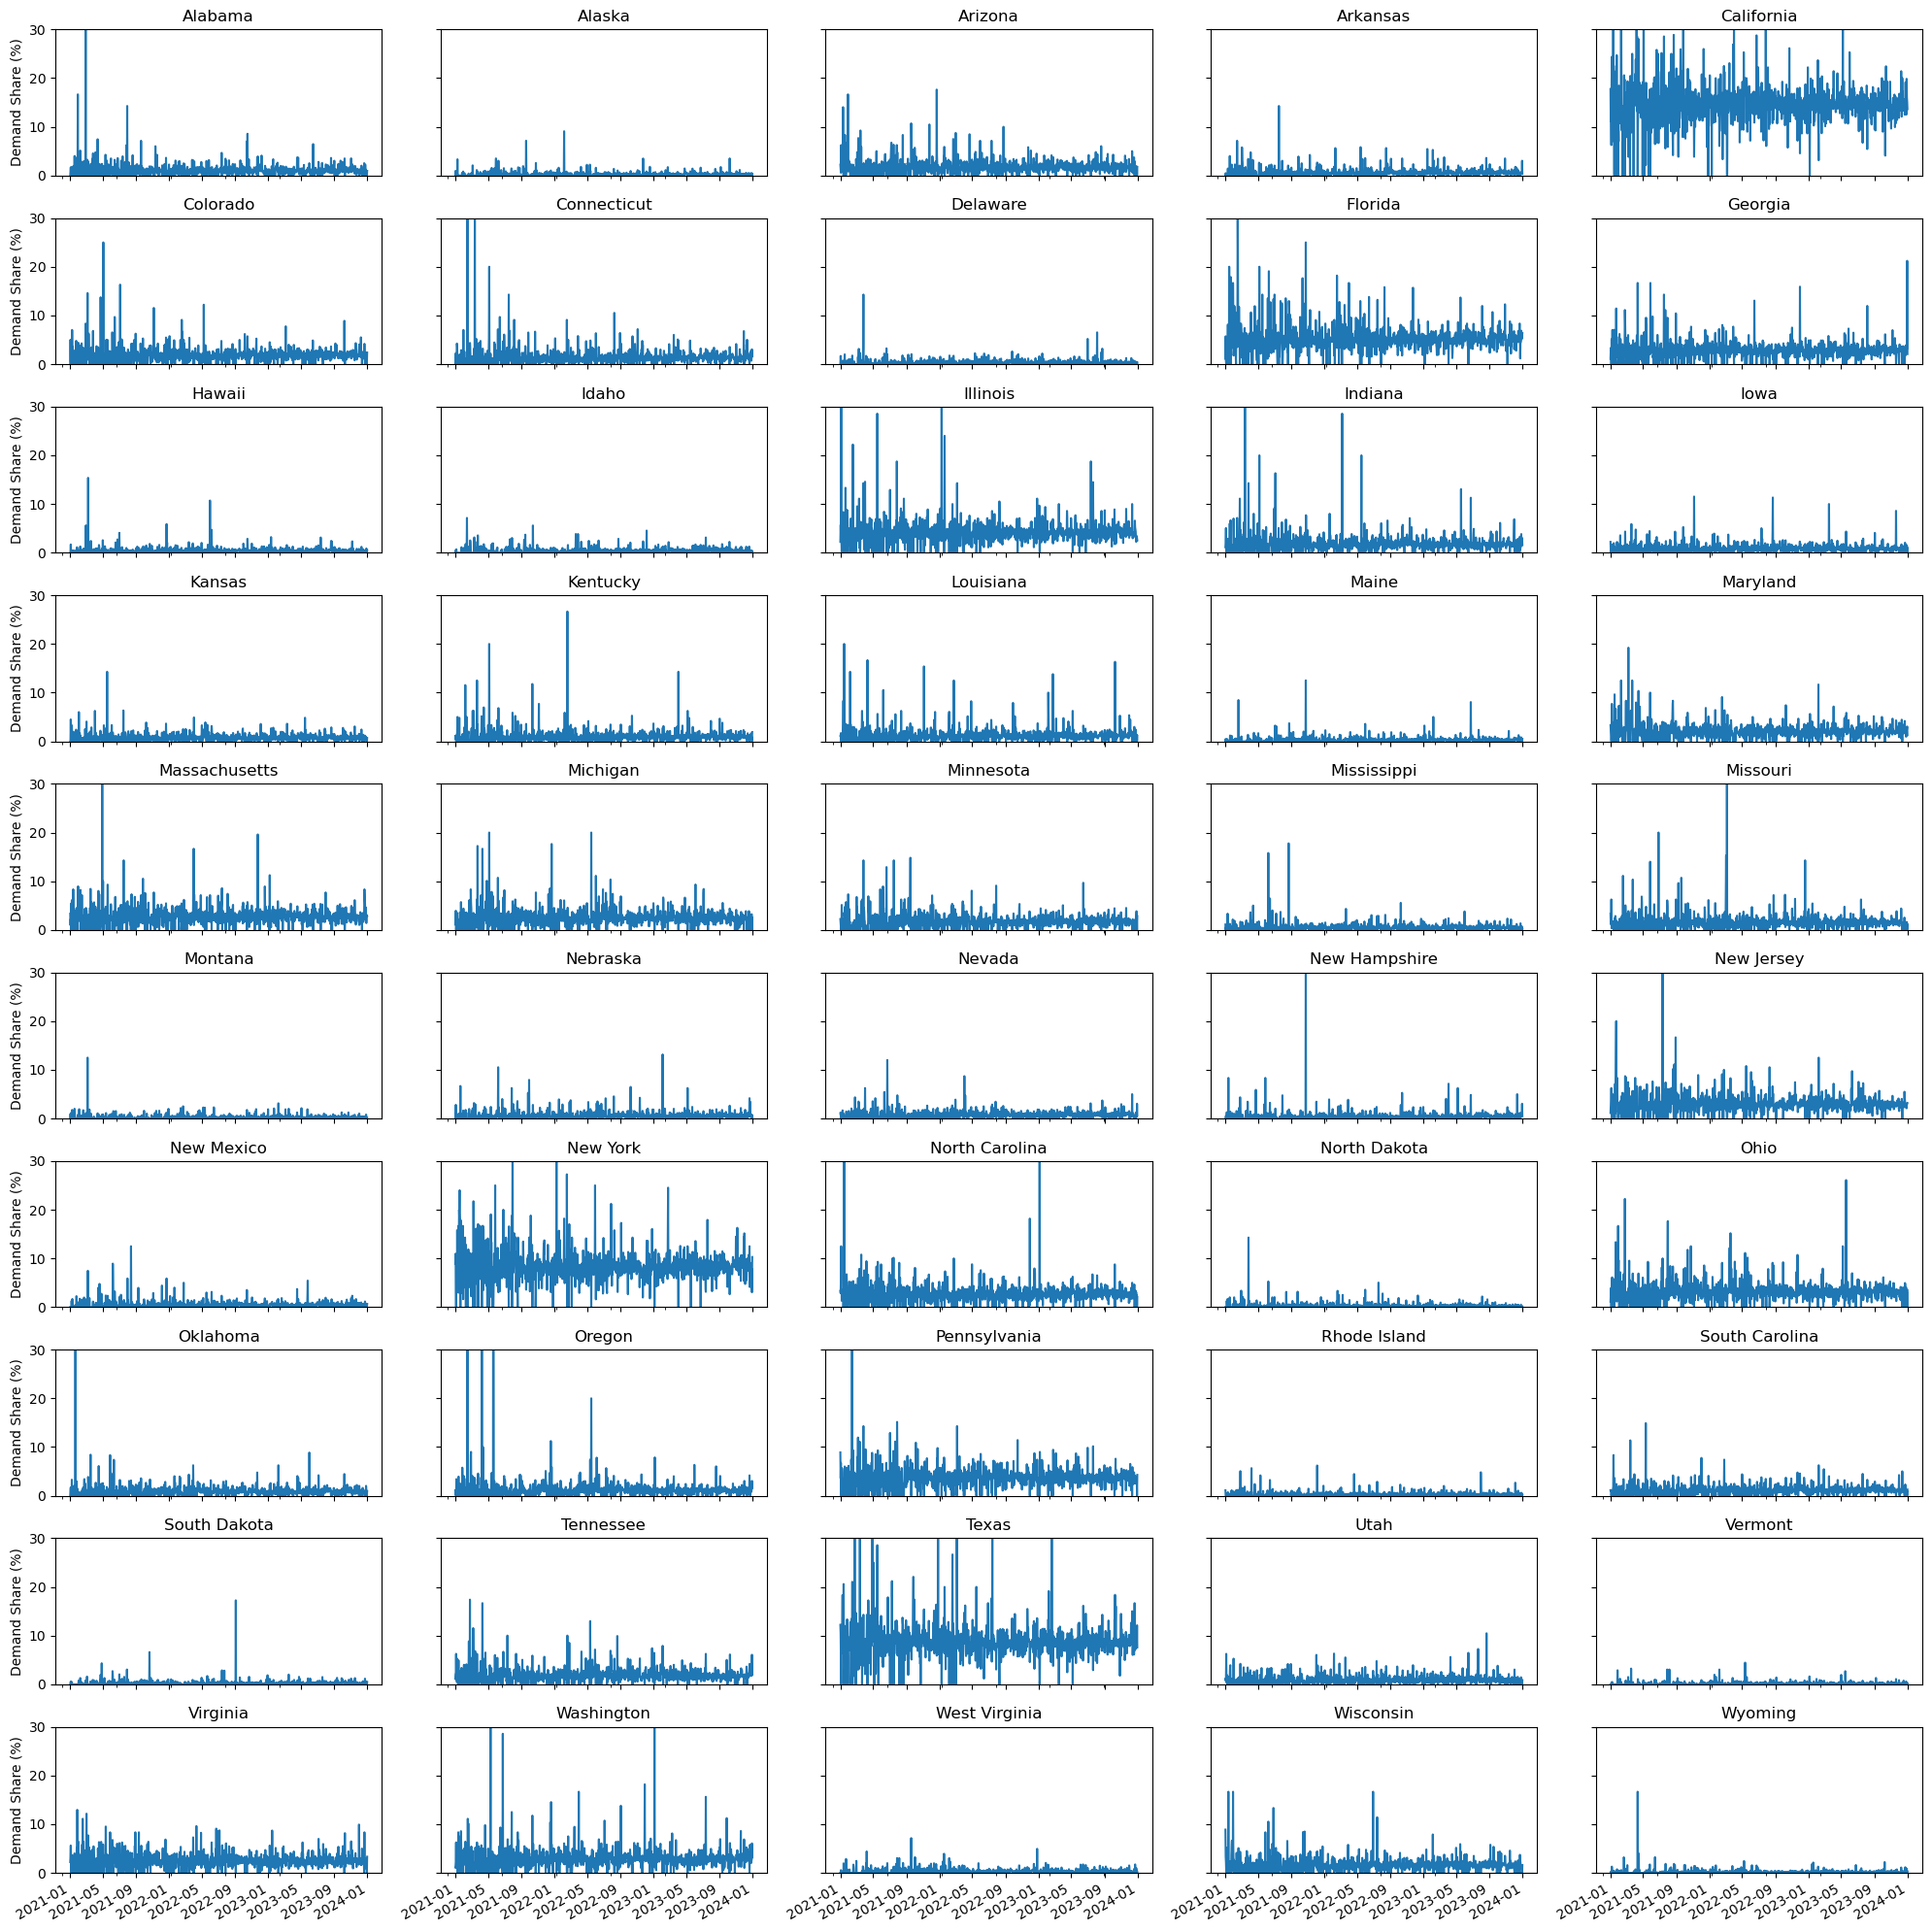

In [24]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20, 20), sharex=True, sharey=True)
axes = axes.flatten()

for i, state in enumerate(pivot_demand_share_by_state.columns):
    pivot_demand_share_by_state[state].plot(ax=axes[i], title=state)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Demand Share (%)')
    axes[i].set_ylim(0, 30)

plt.tight_layout()
plt.show()

These graphs are zoomed in from 0-30% on the y-axis. None seem to particularly stand out in demand share growth.

# Task 5

In [92]:
df_delivery_costs_and_times = pd.read_excel('FruitSoul Expected Delivery Costs and Times.xlsx')

Add acceptable shipping date columns. Make sure they do not land on holidays or Sundays.

In [94]:
# Add shipping date columns
# Merge df_demand_log with df_delivery_costs_and_times to get the delivery times for each state
df_merged = df_demand_log.merge(df_delivery_costs_and_times, left_on='State', right_on='Destination State')

# Calculate the new shipping dates
df_merged['earliestShipping'] = df_merged['earliestDelivery'] - pd.to_timedelta(df_merged['Expected                     Delivery Time     From Stone Mountain (days)'], unit='d')
df_merged['preferredShipping'] = df_merged['preferredDelivery'] - pd.to_timedelta(df_merged['Expected                     Delivery Time     From Stone Mountain (days)'], unit='d')
df_merged['latestShipping'] = df_merged['latestDelivery'] - pd.to_timedelta(df_merged['Expected                     Delivery Time     From Stone Mountain (days)'], unit='d')

# If the shipping date columns are not already datetime, also ensure they are converted
df_merged['earliestShipping'] = pd.to_datetime(df_merged['earliestShipping'])
df_merged['preferredShipping'] = pd.to_datetime(df_merged['preferredShipping'])
df_merged['latestShipping'] = pd.to_datetime(df_merged['latestShipping'])

# Function to check if a date is Labor Day
def is_labor_day(date):
    if date.strftime('%m') == '09' and date.strftime('%d') <= '07' and date.weekday() == 0:
        return True
    return False

# Define the date for the 4th of July 
july_4th = '07-04'

# Function to adjust dates for earliest or latest shipping dates on Sundays, labor days, or 4th of July
def adjust_date(date, type='e'):
    """
    Adjust the date based on the type:
    'e' for Earliest Acceptable Shipping Date,
    'l' for Latest Acceptable Shipping Date
    """
    if type == 'e':
        if date.weekday() == 6:
            date = date + pd.Timedelta(days=1)
        if is_labor_day(date) or date.strftime('%m-%d') == july_4th:
            date = date + pd.Timedelta(days=1)
            if date.weekday() == 6:
                date = date + pd.Timedelta(days=1)
        return date
    
    if type == 'l':
        if is_labor_day(date) or date.strftime('%m-%d') == july_4th:
            date = date - pd.Timedelta(days=1)
        if date.weekday() == 6:
            date = date - pd.Timedelta(days=1)
            if is_labor_day(date) or date.strftime('%m-%d') == july_4th:
                date = date - pd.Timedelta(days=1)
        return date

    return date

# Adjust the dates
df_merged['earliestShipping'] = df_merged['earliestShipping'].apply(lambda x: adjust_date(x, 'e'))
df_merged['latestShipping'] = df_merged['latestShipping'].apply(lambda x: adjust_date(x, 'l'))

# Adjust Preferred Shipping Date to earliest or latest if it is before or after the acceptable range
df_merged['preferredShipping'] = df_merged.apply(
    lambda row: row['earliestShipping'] if row['preferredShipping'] < row['earliestShipping'] else (
        row['latestShipping'] if row['preferredShipping'] > row['latestShipping'] else row['preferredShipping']
    ), axis=1
)

# Function to check if a date is a Sunday, Labor Day, or the 4th of July
def is_special_day(date):
    return date.weekday() == 6 or is_labor_day(date) or date.strftime('%m-%d') == july_4th

# Function to move the date forward by one day if it is a special day
def adjust_preferred_shipping_date(date):
    if is_special_day(date):
        date += pd.Timedelta(days=1)
        if is_special_day(date):
            date -= pd.Timedelta(days=2)
    return date

# Apply the function to the Preferred Shipping Date column
df_merged['preferredShipping'] = df_merged['preferredShipping'].apply(adjust_preferred_shipping_date)

Due to holidays, some demand is no longer feasible (shown below).

In [95]:
# Find the indexes where the 'Earliest Acceptable Shipping Date' is later than the 'Latest Acceptable Shipping Date'
invalid_shipping_dates = df_merged[df_merged['earliestShipping'] > df_merged['latestShipping']].index

# Display the count of such indexes
invalid_shipping_dates_count = len(invalid_shipping_dates)
print(f"Number of indexes with invalid shipping dates: {invalid_shipping_dates_count}")

Number of indexes with invalid shipping dates: 7273


This code double checks all holidays have been avoided.

In [96]:
# Dates for Labor Days
labor_days = ['2021-09-06', '2022-09-05', '2023-09-04']

# Filter the dataframe for entries where any of the shipping dates fall on Labor Days
labor_day_orders = df_merged[
    (df_merged['earliestShipping'].dt.strftime('%Y-%m-%d').isin(labor_days)) |
    (df_merged['preferredShipping'].dt.strftime('%Y-%m-%d').isin(labor_days)) |
    (df_merged['latestShipping'].dt.strftime('%Y-%m-%d').isin(labor_days))
]

# Display the count of such entries
labor_day_orders_count = labor_day_orders.shape[0]
print(f"Number of orders with shipping dates on Labor Days: {labor_day_orders_count}")

# Filter the dataframe for entries where any of the shipping dates fall on a Sunday
sunday_orders = df_merged[
    (df_merged['earliestShipping'].dt.weekday == 6) |
    (df_merged['preferredShipping'].dt.weekday == 6) |
    (df_merged['latestShipping'].dt.weekday == 6)
]

# Display the count of such entries
sunday_orders_count = sunday_orders.shape[0]
print(f"Number of orders with shipping dates on Sundays: {sunday_orders_count}")

# Filter the dataframe for entries where any of the shipping dates fall on the 4th of July
july_4th_orders = df_merged[
    (df_merged['earliestShipping'].dt.strftime('%m-%d') == july_4th) |
    (df_merged['preferredShipping'].dt.strftime('%m-%d') == july_4th) |
    (df_merged['latestShipping'].dt.strftime('%m-%d') == july_4th)
]

# Display the count of such entries
july_4th_orders_count = july_4th_orders.shape[0]
print(f"Number of orders with shipping dates on the 4th of July: {july_4th_orders_count}")

Number of orders with shipping dates on Labor Days: 0
Number of orders with shipping dates on Sundays: 0
Number of orders with shipping dates on the 4th of July: 0


Merge acceptable shipping dates with df_demand_log.

In [118]:
# Drop the extra columns from the merge with main dataframe
df_demand_log = df_merged.drop(columns=['Destination State', 'Approximate distance from Stone Mountain (miles)', 'Expected Delivery Cost From Stone Mountain (USD/ounce)', 'Expected                     Delivery Time     From Stone Mountain (days)'])

Add minimal, preferred, and maximal order-to-ship dates.

In [119]:
# Calculate the order-to-ship times
df_demand_log['minOrderToShip'] = (df_demand_log['earliestShipping'] - df_demand_log['demandRequest']).dt.days
df_demand_log['preferredOrderToShip'] = (df_demand_log['preferredShipping'] - df_demand_log['demandRequest']).dt.days
df_demand_log['maxOrderToShip'] = (df_demand_log['latestShipping'] - df_demand_log['demandRequest']).dt.days

### Using a normal distribution to smooth demand.

In [34]:
# Function to compute demand probabilities based on a normal distribution
def demand_probability(row):
    preferred_date = row['preferredShipping']
    earliest_date = row['earliestShipping']
    latest_date = row['latestShipping']
    
    # Calculate the standard deviation (earliest/latest represent ±2 standard deviations)
    std_dev = (latest_date - earliest_date).days / 4
    
    # Ensure std_dev is at least 1 to avoid division by zero
    std_dev = max(std_dev, 1)
    
    # Initialize empty list for smoothed demand distribution
    demand_distribution = []
    
    # Compute cumulative probabilities for the range of acceptable shipping dates
    for day in pd.date_range(earliest_date, latest_date):
        # CDF at the start and end of the day
        cdf_start = norm.cdf((day - pd.Timedelta(days=0.5) - preferred_date).days, scale=std_dev)
        cdf_end = norm.cdf((day + pd.Timedelta(days=0.5) - preferred_date).days, scale=std_dev)
        
        # Cumulative probability for the 24-hour period (between start and end of the day)
        daily_probability = cdf_end - cdf_start
        
        demand_distribution.append({
            'Date': day,
            'Mix': row['Mix'],
            'Probability': daily_probability
        })
    
    # Convert list to DataFrame
    df_demand_distribution = pd.DataFrame(demand_distribution)

    if len(df_demand_distribution) == 0:
        return pd.DataFrame(columns=['Date', 'Mix', 'Smoothed Daily Demand'])
    
    # Normalize probabilities to sum up to 1, then scale to match total quantity
    total_probability = df_demand_distribution['Probability'].sum()
    df_demand_distribution['Smoothed Daily Demand'] = (df_demand_distribution['Probability'] / total_probability) * row['Quantity']
    
    return df_demand_distribution[['Date', 'Mix', 'Smoothed Daily Demand']]

Note: the code below take a long time to run.

In [35]:
# Apply the function to each row in the demand log and concatenate the results
smoothed_demand_history = pd.concat([demand_probability(row) for _, row in df_demand_log.iterrows()])

# Aggregate smoothed demand over date ranges
final_smoothed_demand_history = smoothed_demand_history.groupby(['Date', 'Mix']).agg({'Smoothed Daily Demand': 'sum'}).reset_index()

C:\Users\natej\AppData\Local\Temp\ipykernel_22136\114796216.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  smoothed_demand_history = pd.concat([demand_probability(row) for _, row in df_demand_log.iterrows()])


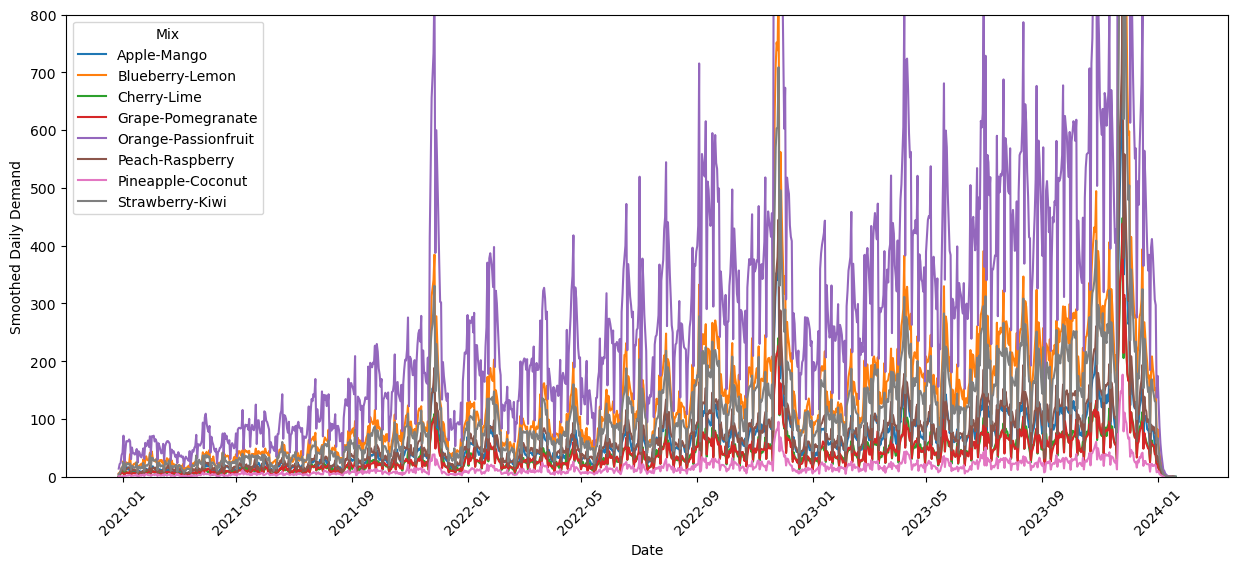

In [36]:
# Group by Mix and plot the smoothed daily demand over time
plt.figure(figsize=(15, 6))
for mix, group in final_smoothed_demand_history.groupby('Mix'):
    plt.plot(group['Date'], group['Smoothed Daily Demand'], label=mix)

plt.xlabel('Date')
plt.ylabel('Smoothed Daily Demand')
plt.legend(title='Mix', loc='upper left')
plt.xticks(rotation=45)
plt.ylim(0, 800)

# Display the plot
plt.show()

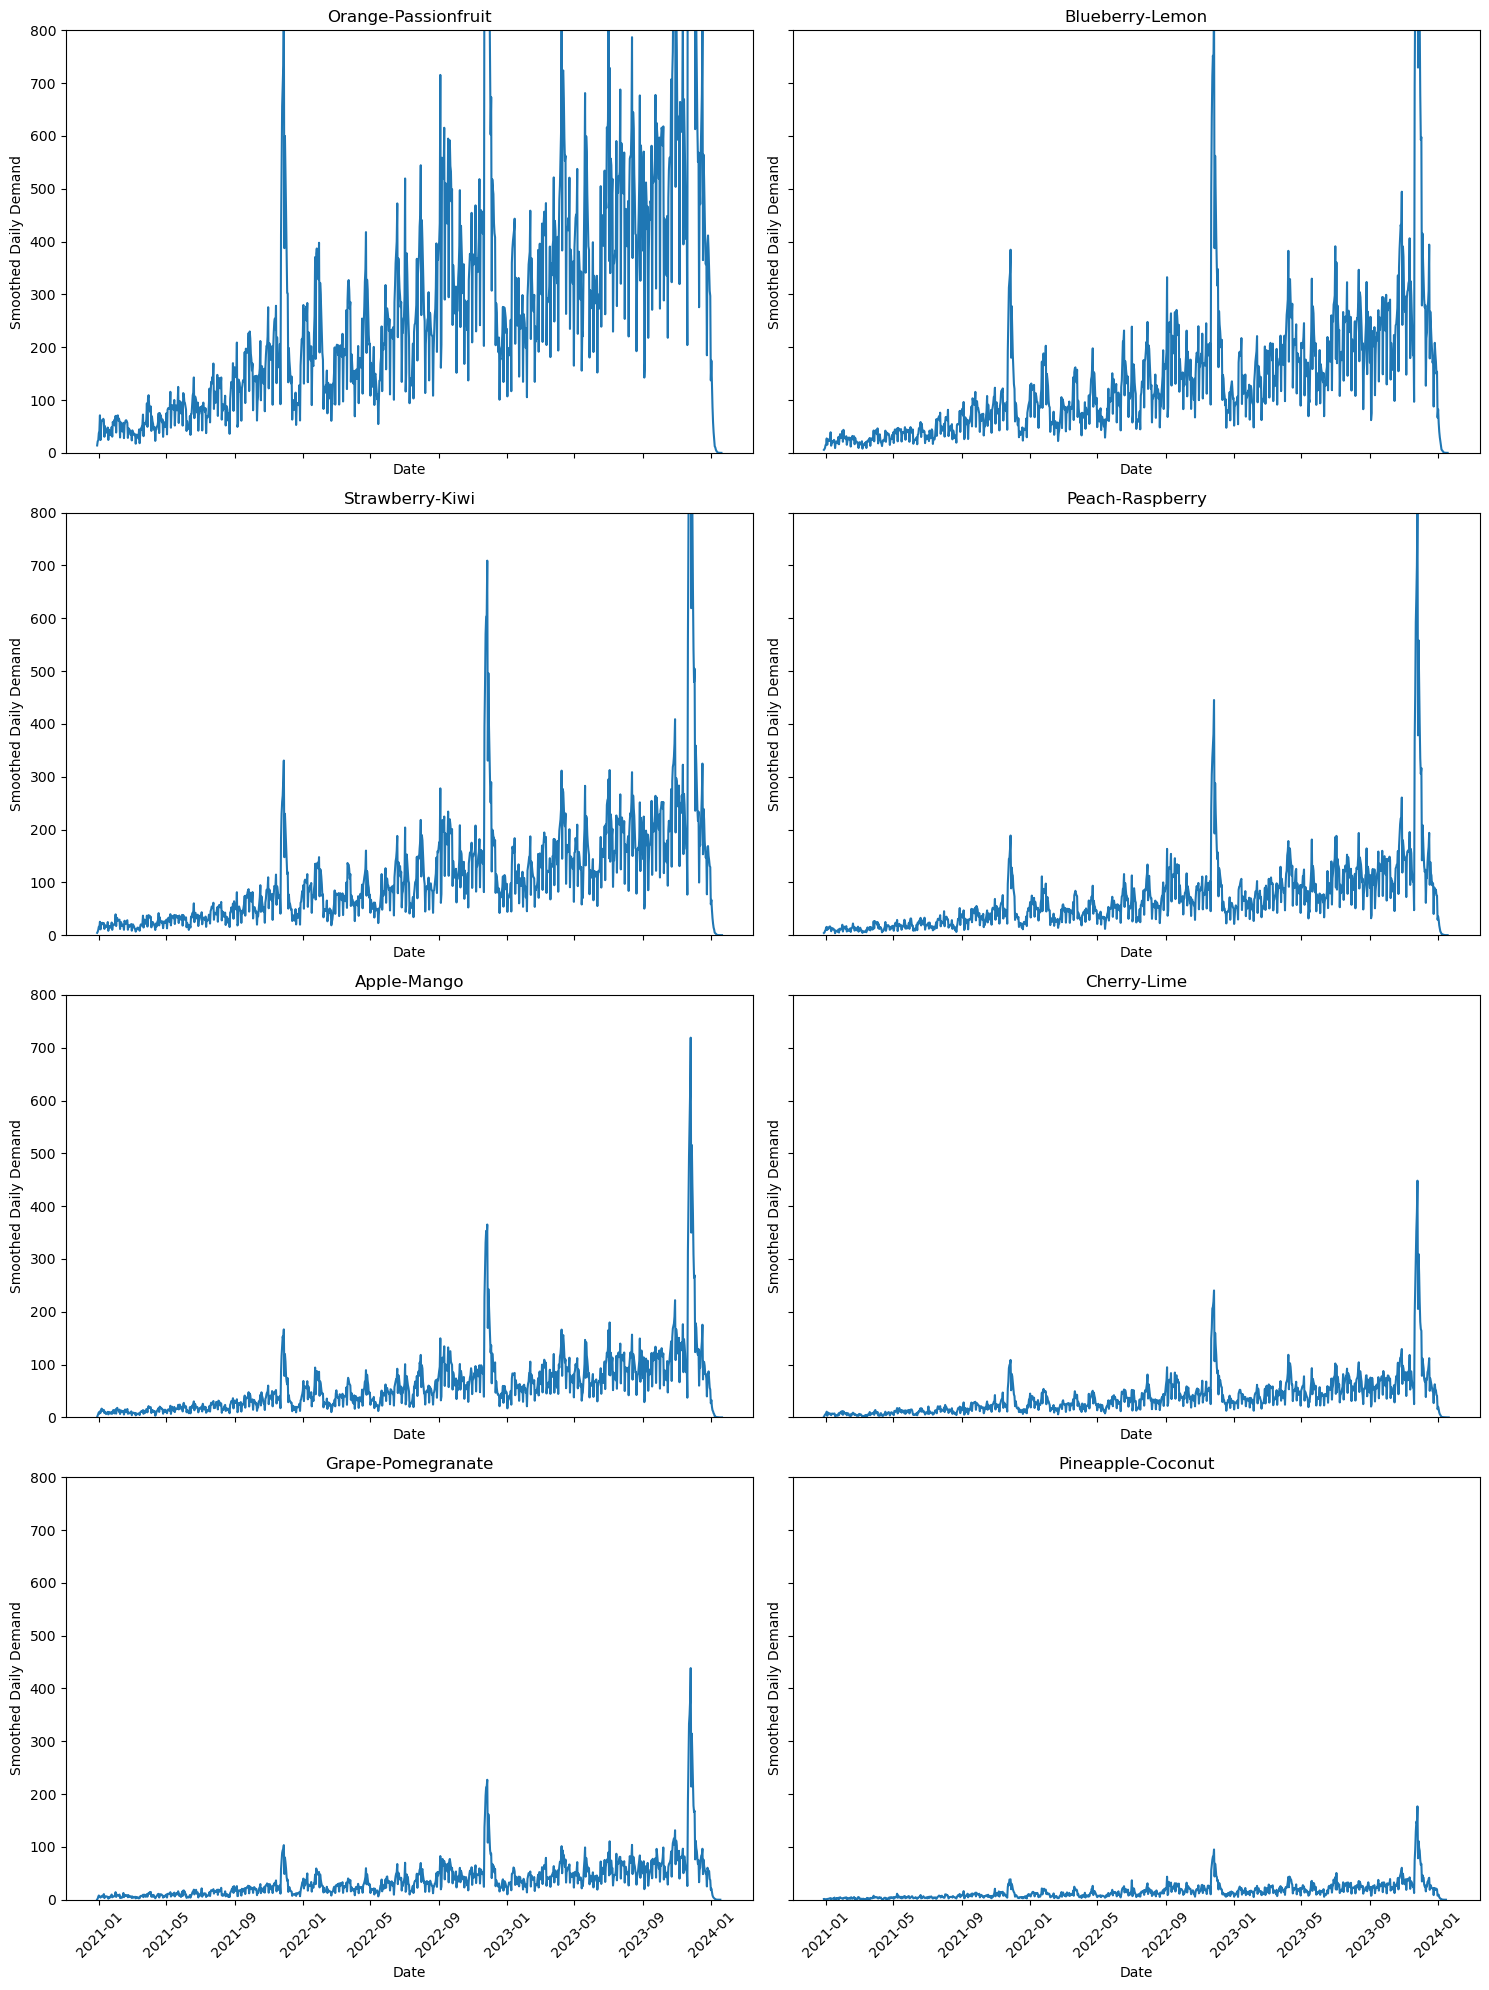

In [37]:
# Get the top 8 mixes by total smoothed daily demand
smoothed_8_mixes = final_smoothed_demand_history.groupby('Mix')['Smoothed Daily Demand'].sum().nlargest(8).index

# Filter the dataframe for only the top 8 mixes
data = final_smoothed_demand_history[final_smoothed_demand_history['Mix'].isin(smoothed_8_mixes)]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each mix in a separate subplot
for i, mix in enumerate(smoothed_8_mixes):
    mix_data = data[data['Mix'] == mix]
    axes[i].plot(mix_data['Date'], mix_data['Smoothed Daily Demand'])
    axes[i].set_title(mix)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Smoothed Daily Demand')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0, 800)  # Set y-axis range

# Adjust layout
plt.tight_layout()
plt.show()

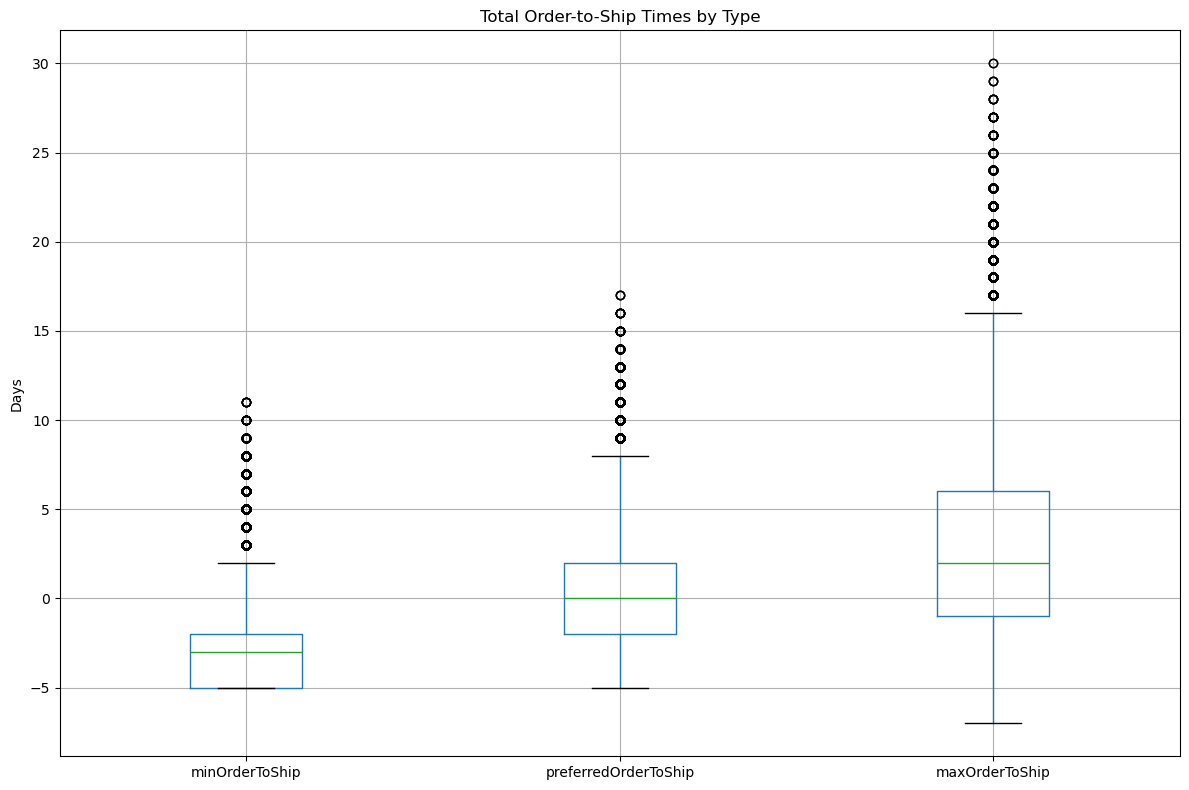

In [38]:
# Creating a boxplot for each of the specified columns in df_demand_log
plt.figure(figsize=(12, 8))

# Plot a box and whisker plot for each of the specified columns
df_demand_log.boxplot(column=['minOrderToShip', 'preferredOrderToShip', 'maxOrderToShip'])

plt.title('Total Order-to-Ship Times by Type')
#plt.xlabel('Order-to-Ship Time Type')
plt.ylabel('Days')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

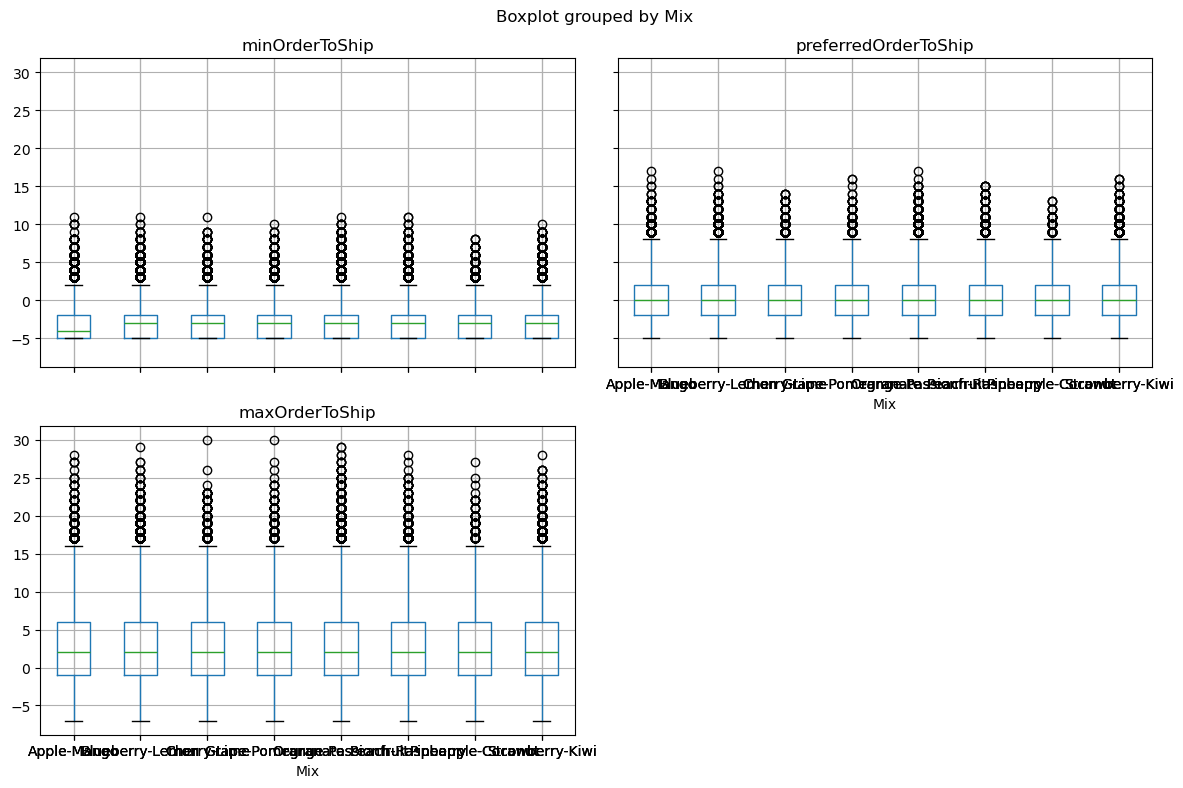

In [39]:

# Creating a boxplot for each Mix across the three specified columns
columns = ['minOrderToShip', 'preferredOrderToShip', 'maxOrderToShip']

plt.figure(figsize=(12, 8))

# Plot a box and whisker plot for each mix and each of the specified columns
df_demand_log.boxplot(column=columns, by='Mix', figsize=(12, 8))

plt.title(' Order-to-Ship Times by Mix')

plt.ylabel('Order-to-Ship Time')
plt.xlabel('Mix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

After evaluating the demand of different product mixes a few things stand out:
First, the demand cycles do not appear consistent on a yearly basis, aside from a reliable spike in early December. The second is the demand for each product mix has grown since 2021, and with this increase in volume of demand comes an increase in the volatility of demand. Third, ship estimates are similar across all products, it does not appear certain product mixes follow different shipping patterns/timelines.

# Task 6

In [122]:
# Find orders impossible to fill
lost_demand = df_demand_log[(df_demand_log['maxOrderToShip'] < 0) | (df_demand_log['earliestShipping'] > df_demand_log['latestShipping'])]
achievable_demand = df_demand_log.drop(lost_demand.index)

# Percentage of lost demand
lost_demand_percentage = lost_demand['Quantity'].sum() / df_demand_log['Quantity'].sum() * 100

print(f'Percentage of lost demand: {lost_demand_percentage:.2f}%')


Percentage of lost demand: 26.50%


About 26.5% of the volume of demand is lost due shipping timelines where the mix that was order would have to be shipped date before the day of request, or earlier. Depending on the responsiveness of the supply chain, this could potentially make day of shipping or shortly after impossible as well.

# Task 7

In [41]:
production_capacity = pd.read_excel('FruitSoul Production and Materials Characteristics and Costs.xlsx', sheet_name='Center Capacity', header=2)
production_capacity.rename(columns={'Unnamed: 1': 'Center', 'Unnamed: 7': "Unit"}, inplace=True)
production_capacity.drop(columns=['Unnamed: 0'], inplace=True)
production_capacity

Center    1     2     3     4     5    Unit
0    Mixing  640  1664  2304  2816  3200  Ounces
1  Bottling  100   175   240   300   350    Jars
2   Packing   30    55   100   130   150    Jars

## Mixing Demand History

Because mixing demand is measured in ounces, it's demand is not exactly in line with packaging and bottling demand.

This code takes a while to run.

In [42]:
# Preferred Demand History
preferred_ounces_demand = achievable_demand.groupby(["preferredShipping"]).agg({"Quantity": "sum"}).reset_index().rename(columns={"jarSize": "Ounces Demand"})

# Earliest Arrival Demand History
early_ounces_demand = achievable_demand.groupby(["earliestShipping"]).agg({"Quantity": "sum"}).reset_index().rename(columns={"jarSize": "Ounces Demand"})

# Latest Arrival Demand History
late_ounces_demand = achievable_demand.groupby(["latestShipping"]).agg({"Quantity": "sum"}).reset_index().rename(columns={"jarSize": "Ounces Demand"})

# Apply the function to each row in the demand log and concatenate the results
smoothed_ounces_demand = pd.concat([demand_probability(row) for _, row in achievable_demand.iterrows()])

C:\Users\natej\AppData\Local\Temp\ipykernel_22136\3956956810.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  smoothed_ounces_demand = pd.concat([demand_probability(row) for _, row in acheivable_demand.iterrows()])


## Packaging and Bottling Demand

Because packaging and bottling demand is measured in jar, the demand will be identical for each order.

In [43]:
# Preferred Demand History
preferred_jars_demand = achievable_demand.groupby(["preferredShipping"]).agg({"jarSize": "sum"}).reset_index().rename(columns={"jarSize": "Jars Demand"})
# Earliest Arrival Demand History
early_jars_demand = achievable_demand.groupby(["earliestShipping"]).agg({"jarSize": "sum"}).reset_index().rename(columns={"jarSize": "Jars Demand"})
# Latest Arrival Demand History
late_jars_demand = achievable_demand.groupby(["latestShipping"]).agg({"jarSize": "sum"}).reset_index().rename(columns={"jarSize": "Jars Demand"})

# Smoothed Arrival Demand History

# Task 8

In [ ]:
# Ensure achievable_demand_temp is defined
achievable_demand_temp = achievable_demand.copy()
achievable_demand_temp.insert(achievable_demand_temp.columns.get_loc('Quantity') + 1, 'ozOfProduct', achievable_demand_temp['jarSize'] * achievable_demand_temp['Quantity'])

# Create a pivot table indexed by preferredShipping date with columns Quantity and ozOfProduct
pivot_preferred_shipping = achievable_demand_temp.pivot_table(
    index='preferredShipping',
    values=['Quantity'],
    aggfunc='sum'
)

In [149]:
achievable_demand_temp

DemandID demandRequest                  Mix  jarSize       State  \
0              1    2021-01-01          Apple-Mango        8    Maryland   
1              2    2021-01-01      Blueberry-Lemon       32    Kentucky   
2              3    2021-01-01  Orange-Passionfruit       16   Minnesota   
3              4    2021-01-01  Orange-Passionfruit       16  California   
4              5    2021-01-01  Orange-Passionfruit       32   Louisiana   
...          ...           ...                  ...      ...         ...   
835369    835370    2023-12-31          Apple-Mango       32    Kentucky   
835370    835371    2023-12-31      Strawberry-Kiwi       32     Indiana   
835371    835372    2023-12-31      Blueberry-Lemon       32    New York   
835373    835374    2023-12-31      Peach-Raspberry       16    New York   
835374    835375    2023-12-31  Orange-Passionfruit       32     Arizona   

        Quantity  ozOfProduct earliestDelivery preferredDelivery  \
0              1            8       2021-01-01        2021-01-04   
1              1           32       2021-01-04        2021-01-06   
2              1           16       2021-01-07        2021-01-10   
3              1           16       2021-01-07        2021-01-11   
4              1           32       2021-01-01        2021-01-04   
...          ...          ...              ...               ...   
835369         1           32       2023-12-31        2024-01-04   
835370         1           32       2023-12-31        2024-01-05   
835371         1           32       2023-12-31        2024-01-07   
835373         1           16       2024-01-03        2024-01-03   
835374         1           32       2023-12-31        2024-01-05   

       latestDelivery earliestShipping preferredShipping latestShipping  \
0          2021-01-07       2020-12-28        2020-12-30     2021-01-02   
1          2021-01-09       2021-01-01        2021-01-04     2021-01-06   
2          2021-01-11       2021-01-02        2021-01-05     2021-01-06   
3          2021-01-14       2021-01-02        2021-01-06     2021-01-09   
4          2021-01-10       2020-12-28        2020-12-31     2021-01-06   
...               ...              ...               ...            ...   
835369     2024-01-04       2023-12-28        2024-01-01     2024-01-01   
835370     2024-01-05       2023-12-28        2024-01-02     2024-01-02   
835371     2024-01-07       2023-12-26        2024-01-02     2024-01-02   
835373     2024-01-09       2023-12-29        2023-12-29     2024-01-04   
835374     2024-01-13       2023-12-26        2024-01-01     2024-01-08   

        minOrderToShip  preferredOrderToShip  maxOrderToShip  
0                   -4                    -2               1  
1                    0                     3               5  
2                    1                     4               5  
3                    1                     5               8  
4                   -4                    -1               5  
...                ...                   ...             ...  
835369              -3                     1               1  
835370              -3                     2               2  
835371              -5                     2               2  
835373              -2                    -2               4  
835374              -5                     1               8  

[614063 rows x 16 columns]

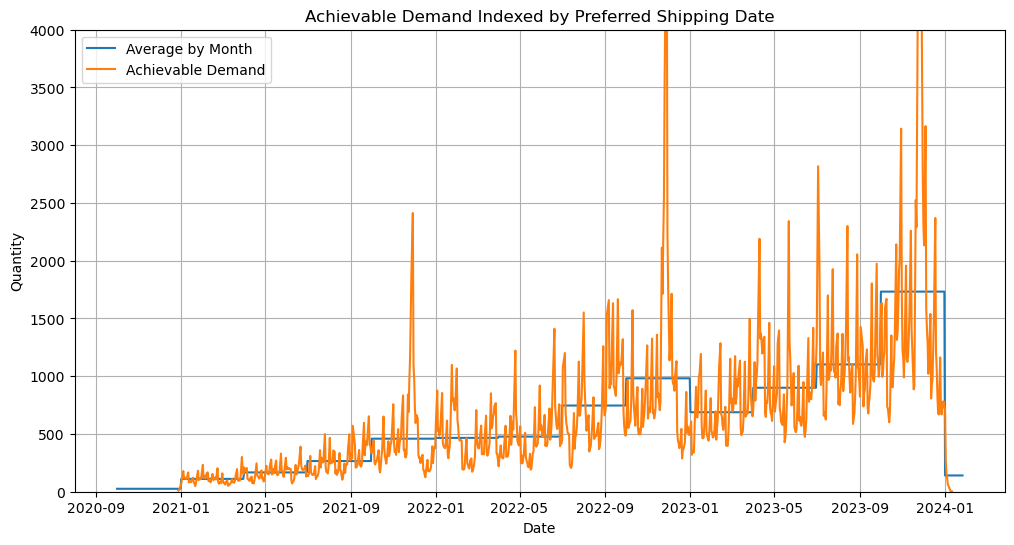

In [150]:
# Resample the pivot_preferred_shipping to monthly frequency and calculate the mean
quarterly_average_preferred_shipping = pivot_preferred_shipping.resample('QE').mean()

# Refine average quantity by quarter to make a proper line plot
for i in quarterly_average_preferred_shipping.index:
    three_months_prior = (i - pd.DateOffset(months=2)).month
    year_month = pd.to_datetime(f'{i.year}-{three_months_prior}-01')
    new_row = pd.DataFrame({'Quantity': [quarterly_average_preferred_shipping.loc[i, 'Quantity']]}, index=[year_month])
    quarterly_average_preferred_shipping = pd.concat([quarterly_average_preferred_shipping, new_row]).sort_index()

quarterly_average_preferred_shipping.index = quarterly_average_preferred_shipping.index[:-1].append(pd.to_datetime([last_day]))

plt.figure(figsize=(12, 6))

plt.plot(quarterly_average_preferred_shipping.index, quarterly_average_preferred_shipping['Quantity'], label='Average by Month')

# Plot achievable demand indexed by preferred shipping date with quantity
plt.plot(pivot_preferred_shipping.index, pivot_preferred_shipping['Quantity'], label='Achievable Demand')

plt.title('Achievable Demand Indexed by Preferred Shipping Date')
plt.xlabel('Date')
plt.ylabel('Quantity')

plt.ylim(0, 4000)

plt.legend()
plt.grid(True)
plt.show()
